<a href="https://colab.research.google.com/github/evelyyyn-cc/stickers-attack/blob/main/FIT5230.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group: Dark.The Pretender

Team members: Chen Wanning, Chen Wei

# Milestone 3 Progress

In Milestone 3, we developed a method to optimize the application of adversarial stickers on target facial images by exploring two stickers, their size, and position variations. We conducted experiments using a facial image dataset and evaluated the misclassification success rate of different configurations. The results show that varying the placement and size of stickers can significantly improve the success rate of these attacks. Our work highlights the vulnerability of facial recognition systems to such adversarial perturbations and provides a foundation for future research to strengthen model defenses against similar attacks.

# Install library

In [ ]:
!pip install xlwt
!pip install dlib
!pip install opencv-python-headless
!pip install torch
!pip install facenet-pytorch
!pip install tqdm
!pip install numpy
!pip install scikit-image
!pip install --upgrade facenet-pytorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 80.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.

# General import

In [ ]:
import os
import shutil
from collections import Counter
from torchvision import datasets, transforms
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from facenet_pytorch import InceptionResnetV1
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from tqdm import tqdm
from torch.optim.lr_scheduler import ReduceLROnPlateau
import logging
from typing import Tuple, Dict
import json
import random
import shutil
from pathlib import Path
import time
from collections import defaultdict
import torch.nn.functional as F
import dlib
import cv2



# Download and preprocess data

We use the LFW dataset in this assignment, which is widely used in face verification and recognition tasks.
Before using the dataset to train a deep learning model, we will first process the dataset because the dataset itself has many problems. Some people have only one photo, while some have as many as 530. This makes the dataset extremely unbalanced. In addition, some categories in the dataset have only one sample, which makes it impossible for the model to learn the changes in the category.

In [ ]:
!gdown --fuzzy  https://drive.google.com/file/d/16W00qGZnPvAD-LdtGeyv3kQND3ZK1mQM/view?usp=sharing

Downloading...
From (original): https://drive.google.com/uc?id=1Jt6ZKsvHNMjtTqCmGrgmJ_DVUvFS6sew
From (redirected): https://drive.google.com/uc?id=1Jt6ZKsvHNMjtTqCmGrgmJ_DVUvFS6sew&confirm=t&uuid=2e2d261f-ddee-4bbf-afb5-025c42af618c
To: /content/AdvSticker.zip
100% 127M/127M [00:00<00:00, 139MB/s]


In [ ]:
!unzip /content/AdvStickers.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/AdvSticker/lfw-deepfunneled/Recep_Tayyip_Erdogan/Recep_Tayyip_Erdogan_0030.jpg  
  inflating: /content/__MACOSX/AdvSticker/lfw-deepfunneled/Recep_Tayyip_Erdogan/._Recep_Tayyip_Erdogan_0030.jpg  
  inflating: /content/AdvSticker/lfw-deepfunneled/Recep_Tayyip_Erdogan/Recep_Tayyip_Erdogan_0018.jpg  
  inflating: /content/__MACOSX/AdvSticker/lfw-deepfunneled/Recep_Tayyip_Erdogan/._Recep_Tayyip_Erdogan_0018.jpg  
  inflating: /content/AdvSticker/lfw-deepfunneled/Recep_Tayyip_Erdogan/Recep_Tayyip_Erdogan_0019.jpg  
  inflating: /content/__MACOSX/AdvSticker/lfw-deepfunneled/Recep_Tayyip_Erdogan/._Recep_Tayyip_Erdogan_0019.jpg  
  inflating: /content/AdvSticker/lfw-deepfunneled/Recep_Tayyip_Erdogan/Recep_Tayyip_Erdogan_0025.jpg  
  inflating: /content/__MACOSX/AdvSticker/lfw-deepfunneled/Recep_Tayyip_Erdogan/._Recep_Tayyip_Erdogan_0025.jpg  
  inflating: /content/AdvSticker/lfw-deepfunneled/Recep_Tayyip_Erdogan/Recep_Tayy

In [ ]:
def clean_and_preprocess_dataset(input_dir, output_dir, min_samples=10, max_samples=100):
    # Create output directory
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Load the dataset
    dataset = datasets.ImageFolder(input_dir)
    class_to_idx = dataset.class_to_idx
    samples = dataset.samples

    # Count the number of samples per class
    class_counts = Counter(target for _, target in samples)

    # Filter classes that meet the sample size conditions
    valid_classes = {cls: count for cls, count in class_counts.items()
                     if min_samples <= count <= max_samples}

    # Data augmentation transformations
    data_transforms = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.Resize((160, 160)),
    ])

    # Reverse mapping from index to class name
    idx_to_class = {v: k for k, v in class_to_idx.items()}

    # Process and copy images
    for cls_idx in valid_classes.keys():
        cls = idx_to_class[cls_idx]  # Get class name
        cls_dir = os.path.join(output_dir, cls)
        os.makedirs(cls_dir)

        cls_samples = [s for s in samples if s[1] == cls_idx]
        num_augmentations = max(1, min(max_samples // len(cls_samples), 5))

        for img_path, _ in cls_samples:
            img = Image.open(img_path)
            for i in range(num_augmentations):
                if i == 0:
                    # Save the original image
                    img.save(os.path.join(cls_dir, f"{os.path.basename(img_path)}"))
                else:
                    # Save augmented images
                    augmented_img = data_transforms(img)
                    augmented_img.save(os.path.join(cls_dir, f"{i}_{os.path.basename(img_path)}"))

    print(f"Processed dataset saved to {output_dir}")
    print(f"Number of classes after cleaning: {len(valid_classes)}")


We split the dataset into 80% training set and 20% test set.

In [ ]:
def split_dataset(input_dir, output_dir, test_size=0.2):
    # Check final_output_dir exist or not
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Create output directories for train and test sets
    train_dir = os.path.join(output_dir, 'train')
    test_dir = os.path.join(output_dir, 'test')
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    # Iterate through each class
    for cls in os.listdir(input_dir):
        cls_dir = os.path.join(input_dir, cls)
        if not os.path.isdir(cls_dir):
            continue

        # Get all image files
        images = [f for f in os.listdir(cls_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

        # Split the data into training and test sets
        train_images, test_images = train_test_split(images, test_size=test_size, random_state=42)

        # Copy images to the respective directories
        for img in train_images:
            src = os.path.join(cls_dir, img)
            dst = os.path.join(train_dir, cls, img)
            os.makedirs(os.path.dirname(dst), exist_ok=True)
            shutil.copy(src, dst)

        for img in test_images:
            src = os.path.join(cls_dir, img)
            dst = os.path.join(test_dir, cls, img)
            os.makedirs(os.path.dirname(dst), exist_ok=True)
            shutil.copy(src, dst)

    print(f"Dataset split into train and test sets in {output_dir}")

In [ ]:
def data_process():
    input_dir = '/content/AdvSticker/lfw-deepfunneled'
    output_dir = '/content/AdvSticker/processed_dataset'
    final_output_dir = '/content/AdvSticker/final_dataset'

    # Clean and preprocess the dataset
    clean_and_preprocess_dataset(input_dir, output_dir, min_samples=10, max_samples=100)

    # Split the dataset into training and test sets
    split_dataset(output_dir, final_output_dir, test_size=0.2)

    print("Data preprocessing completed!")

In [ ]:
data_process()

Processed dataset saved to /content/AdvSticker/processed_dataset
Number of classes after cleaning: 153
Dataset split into train and test sets in /content/AdvSticker/final_dataset
Data preprocessing completed!


# Model Preparation



## shape_predictor_68_face_landmarks

In this project, we used a model specifically designed for facial key point detection, which can identify and locate 68 key points of the face. These key points cover the main characteristic areas of the face, including eyes, eyebrows, nose, mouth, and contours. We use this model to determine the best location to place stickers on the face.

In [ ]:
!git clone https://github.com/r4onlyrishabh/facial-detection.git

Cloning into 'facial-detection'...
remote: Enumerating objects: 32, done.
remote: Total 32 (delta 0), reused 0 (delta 0), pack-reused 32 (from 1)
Receiving objects: 100% (32/32), 69.06 MiB | 8.15 MiB/s, done.
Resolving deltas: 100% (10/10), done.


## Face Recognition model train and evaluation


- Since the original code only provides examples and does not have a complete trained face recognition model, we used a deep learning method to fine-tune the pre-trained InceptionResnetV1 model and optimize it for specific face recognition tasks.
- The entire process covers multiple stages from data loading, preprocessing, model training, evaluation to result visualization. The final model can learn the facial features of different individuals from the image dataset and effectively identify and classify these individuals.

In [ ]:
class DatasetManager:
    @staticmethod
    def set_seed(seed: int = 42) -> None:
        random.seed(seed)
        np.random.seed(seed)
        torch.manual_seed(seed)
        if torch.cuda.is_available():
            torch.cuda.manual_seed(seed)
            torch.backends.cudnn.deterministic = True

    @staticmethod
    def load_data(data_dir: str, batch_size: int = 32, num_workers: int = 2) -> Tuple[DataLoader, DataLoader, int]:
        train_transform = transforms.Compose([
            transforms.Resize((160, 160)),
            transforms.RandomHorizontalFlip(),
            transforms.RandomRotation(10),
            transforms.ColorJitter(brightness=0.2, contrast=0.2),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

        test_transform = transforms.Compose([
            transforms.Resize((160, 160)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

        try:
            train_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'), transform=train_transform)
            test_dataset = datasets.ImageFolder(os.path.join(data_dir, 'test'), transform=test_transform)
        except Exception as e:
            logging.error(f"data loading failed: {str(e)}")
            raise

        train_loader = DataLoader(
            train_dataset,
            batch_size=batch_size,
            shuffle=True,
            num_workers=num_workers,
            pin_memory=True
        )

        test_loader = DataLoader(
            test_dataset,
            batch_size=batch_size,
            shuffle=False,
            num_workers=num_workers,
            pin_memory=True
        )

        print(f"data loading successful: Number of training set samples: {len(train_loader.dataset)}, Number of testing set samples: {len(test_loader.dataset)}")
        return train_loader, test_loader, len(train_dataset.classes)


In [ ]:
class ModelTrainer:
    def __init__(self, model, criterion, optimizer, scheduler, device):
        self.model = model
        self.criterion = criterion
        self.optimizer = optimizer
        self.scheduler = scheduler
        self.device = device
        self.best_accuracy = 0
        self.patience = 0
        self.max_patience = 5

    def train_epoch(self, train_loader: DataLoader) -> float:
        """train one epoch"""
        self.model.train()
        running_loss = 0.0
        pbar = tqdm(train_loader, desc="Training Epoch")

        for inputs, labels in pbar:
            inputs, labels = inputs.to(self.device), labels.to(self.device)

            self.optimizer.zero_grad()
            outputs = self.model(inputs)
            loss = self.criterion(outputs, labels)
            loss.backward()

            # perform gradient clip
            torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1.0)

            self.optimizer.step()
            running_loss += loss.item()

            pbar.set_postfix({'loss': f'{loss.item():.4f}'})

        print(f"train_loss: {running_loss / len(train_loader):.4f}")
        return running_loss / len(train_loader)

    def evaluate(self, test_loader: DataLoader) -> Tuple[float, Dict]:
        self.model.eval()
        all_preds = []
        all_labels = []
        running_loss = 0.0

        with torch.no_grad():
            for inputs, labels in tqdm(test_loader, desc="Evaluating"):
                inputs, labels = inputs.to(self.device), labels.to(self.device)
                outputs = self.model(inputs)
                loss = self.criterion(outputs, labels)
                running_loss += loss.item()

                _, preds = torch.max(outputs, 1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        accuracy = accuracy_score(all_labels, all_preds)
        val_loss = running_loss / len(test_loader)

        print(f"val_loss: {val_loss:.4f}, accuracy: {accuracy:.4f}")
        return accuracy, classification_report(all_labels, all_preds, zero_division=1), val_loss

    def train(self, train_loader: DataLoader, test_loader: DataLoader, num_epochs: int = 10, save_path: str = 'best_model.pth') -> Dict:
        """the full training progress"""
        history = {'train_loss': [], 'val_loss': [], 'accuracy': []}

        for epoch in range(num_epochs):
            print(f"\n===== Epoch {epoch+1}/{num_epochs} =====")
            train_loss = self.train_epoch(train_loader)
            accuracy, _, val_loss = self.evaluate(test_loader)

            self.scheduler.step(val_loss)

            history['train_loss'].append(train_loss)
            history['val_loss'].append(val_loss)
            history['accuracy'].append(accuracy)

            if accuracy > self.best_accuracy:
                self.best_accuracy = accuracy
                self.patience = 0
                torch.save({
                    'epoch': epoch,
                    'model_state_dict': self.model.state_dict(),
                    'optimizer_state_dict': self.optimizer.state_dict(),
                    'accuracy': accuracy,
                }, save_path)
                print(f"the model has been savef，current accuracy: {accuracy:.4f}")
            else:
                self.patience += 1
                print(f"the accuracy did not increase，the value of patience: {self.patience}/{self.max_patience}")

            if self.patience >= self.max_patience:
                print("early stopping，training over")
                break

        return history, self.model


In [ ]:
def visualize_training(history: Dict) -> None:
    plt.figure(figsize=(12, 4))

    # loss curve
    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # accuracy curve
    plt.subplot(1, 2, 2)
    plt.plot(history['accuracy'], label='Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [ ]:
def visualize_results(model, test_loader, device, class_names, num_images=5):
    model.eval()
    fig, axes = plt.subplots(1, num_images, figsize=(20, 4))
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(test_loader):
            if i >= num_images:
                break
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            axes[i].imshow(inputs[0].cpu().permute(1, 2, 0))
            axes[i].set_title(f'Pred: {class_names[preds[0]]}\nTrue: {class_names[labels[0]]}')
            axes[i].axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
logging.basicConfig(level=logging.INFO)

DatasetManager.set_seed()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
logging.info(f'device: {device}')

# load dataset
data_dir = '/content/AdvSticker/final_dataset'
train_loader, test_loader, num_classes = DatasetManager.load_data(data_dir)

In [ ]:
# initialize model
model = InceptionResnetV1(pretrained='vggface2', classify=True, num_classes=num_classes)
model = model.to(device)
print(model)


# define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2)

Epoch 1/10, Loss: 2.435143112506665
Epoch 2/10, Loss: 0.6792539679773257
Epoch 3/10, Loss: 0.3398329315208633
Epoch 4/10, Loss: 0.23189739539274867
Epoch 5/10, Loss: 0.1914377389410117
Epoch 6/10, Loss: 0.0760746986562596
Epoch 7/10, Loss: 0.03402863169157825
Epoch 8/10, Loss: 0.022214433548867072
Epoch 9/10, Loss: 0.018590377085402766
Epoch 10/10, Loss: 0.01528433164701351


In [ ]:
# create trainer
trainer = ModelTrainer(model, criterion, optimizer, scheduler, device)

history = trainer.train(train_loader, test_loader)

In [ ]:
visualize_training(history)

In [ ]:
checkpoint = torch.load('best_model.pth')
model.load_state_dict(checkpoint['model_state_dict'])
final_accuracy, final_report, _ = trainer.evaluate(test_loader)

print("\nFinal result:")
print(f"Best accuracy: {final_accuracy:.4f}")
print("\nClassification report:")
print(final_report)

# Peform attack

# 贴纸生成

# 攻击应用模型

1. **Feature-aware sticker positioning**:
     - Innovatively combines Saliency Detection and Edge Detection for sticker position selection. This dual feature extraction mechanism can find visually feature-rich areas in the image, improving the effectiveness of the attack. By calculating the saliency score and edge density of local areas, stickers can be placed better.

2. **Multi-level sticker optimization:**
     - Designed a practical sticker optimization process, including:



           - Contrast adaptive adjustment
           - High frequency noise addition
           - Image sharpening
           - color perturbation



Through these optimization steps, the visual feature expression ability of the sticker is improved while maintaining good concealment.


3. **Improved sticker fusion algorithm:**
   - A sticker fusion method based on gradient alpha channel is proposed. By applying Gaussian blur and gradient transparency to the edge of the sticker, a smooth transition between the sticker and the original image is achieved, improving the visual naturalness of the attack.

4. **Iterative attack optimization:**
   - Implemented an attack effect evaluation mechanism based on model confidence. The system tries different sticker combinations through multiple rounds and selects the optimal attack plan based on the prediction confidence of the target model, which improves the success rate of the attack to a certain extent.

# randomly cut from the pic as stickers

In [ ]:
def sample_dataset(source_dir, samples_per_class=10):
    """
    Sample a fixed number of images from each class.

    Args:
        source_dir: Root directory of the dataset.
        samples_per_class: Number of images to sample per class.

    Returns:
        A list of sampled image paths and their corresponding class names.
    """
    sampled_images = []
    class_counts = defaultdict(int)

    print("Sampling the dataset...")

    # Get all classes
    classes = [d for d in os.listdir(source_dir)
              if os.path.isdir(os.path.join(source_dir, d))]
    print(f"Found {len(classes)} classes")

    # Randomly sample from each class
    for class_name in classes:
        class_dir = os.path.join(source_dir, class_name)
        images = [f for f in os.listdir(class_dir)
                 if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

        # Use all images if the class has fewer than the specified number of samples
        n_samples = min(samples_per_class, len(images))
        selected_images = random.sample(images, n_samples)

        for img_name in selected_images:
            img_path = os.path.join(class_dir, img_name)
            sampled_images.append((img_path, class_name))
            class_counts[class_name] += 1

    print(f"Total sampled {len(sampled_images)} images")
    print(f"Average per class: {np.mean(list(class_counts.values())):.1f} images")

    return sampled_images


In [ ]:
class StickerAttack:
    def __init__(self, model, device='cuda' if torch.cuda.is_available() else 'cpu'):
        self.model = model.to(device)
        self.device = device
        self.transform = transforms.Compose([
            transforms.Resize((160, 160)),
            transforms.ToTensor(),
            transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
        ])

    def evaluate_attack(self, image, original_pred=None):
        """Evaluate the effectiveness of the attack"""
        self.model.eval()
        with torch.no_grad():
            input_tensor = self.transform(image).unsqueeze(0).to(self.device)
            output = self.model(input_tensor)
            prob = F.softmax(output, dim=1)
            pred_class = torch.argmax(output, dim=1).item()
            confidence = prob[0][pred_class].item()

            if original_pred is None:
                return pred_class, confidence, confidence
            return pred_class != original_pred, pred_class, confidence

    def apply_sticker(self, image, sticker, position):
        """Apply a sticker to the image"""
        x, y, w, h = position
        result = np.array(image).astype(np.float32)

        # Resize the sticker
        sticker_resized = sticker.resize((w, h))
        sticker_array = np.array(sticker_resized).astype(np.float32)

        # Create an alpha channel
        alpha = np.ones((h, w), dtype=np.float32) * 0.8  # Fixed transparency
        alpha = alpha[..., np.newaxis]

        # Blend the sticker
        blend_region = result[y:y+h, x:x+w] * (1 - alpha) + sticker_array * alpha
        result[y:y+h, x:x+w] = blend_region

        return Image.fromarray(np.clip(result, 0, 255).astype(np.uint8))

    def attack(self, image_path, sticker_list):
        """Perform the attack"""
        # Load the image
        if isinstance(image_path, str):
            image = Image.open(image_path).convert('RGB')
        else:
            image = image_path  # Already a PIL Image object

        sticker = sticker_list[0]  # Use the provided fixed sticker
        width, height = image.size

        # Get the original prediction
        self.model.eval()
        with torch.no_grad():
            input_tensor = self.transform(image).unsqueeze(0).to(self.device)
            original_pred = torch.argmax(self.model(input_tensor), dim=1).item()
            original_conf = F.softmax(self.model(input_tensor), dim=1)[0, original_pred].item()

        print(f"Original predicted class: {original_pred}, Confidence: {original_conf:.3f}")

        best_attack = None
        best_confidence = 1.0

        # Try different sticker positions and sizes
        sticker_sizes = [(30, 30), (40, 40), (50, 50)]

        for w, h in sticker_sizes:
            # Try the sticker at different positions on the image
            for x in range(0, width-w, w//2):
                for y in range(0, height-h, h//2):
                    # Apply the sticker
                    attacked_img = self.apply_sticker(image, sticker, (x, y, w, h))

                    # Evaluate the attack's effectiveness
                    with torch.no_grad():
                        input_tensor = self.transform(attacked_img).unsqueeze(0).to(self.device)
                        output = self.model(input_tensor)
                        prob = F.softmax(output, dim=1)
                        pred_class = torch.argmax(output, dim=1).item()
                        confidence = prob[0][pred_class].item()

                        if pred_class != original_pred and confidence < best_confidence:
                            best_attack = (attacked_img, pred_class, confidence)
                            best_confidence = confidence
                            print(f"Found a better attack - New class: {pred_class}, Confidence: {confidence:.3f}")

        return best_attack, original_pred


Sampling the dataset...
Found 153 classes
Total sampled 153 images
Average per class: 1.0 images
Creating sticker bank...
Sticker bank size: 153 images

Processing sampled dataset...


Processing images:   0%|          | 0/153 [00:00<?, ?it/s]

Original predicted class: 4, Confidence: 0.997
Found a better attack - New class: 9, Confidence: 0.314


Success Rate: 100.00% | Avg Confidence Reduction: 0.739 | Avg Pixel Difference: 8.73 | Avg Time: 3.1s:   1%|          | 1/153 [00:03<07:51,  3.10s/it]

Found a better attack - New class: 86, Confidence: 0.258
Original predicted class: 17, Confidence: 1.000
Found a better attack - New class: 94, Confidence: 0.670


Success Rate: 100.00% | Avg Confidence Reduction: 0.534 | Avg Pixel Difference: 8.37 | Avg Time: 3.3s:   1%|▏         | 2/153 [00:06<08:21,  3.32s/it]

Original predicted class: 135, Confidence: 0.612
Found a better attack - New class: 39, Confidence: 0.522
Found a better attack - New class: 39, Confidence: 0.521
Found a better attack - New class: 39, Confidence: 0.512
Found a better attack - New class: 39, Confidence: 0.502


Success Rate: 100.00% | Avg Confidence Reduction: 0.393 | Avg Pixel Difference: 6.14 | Avg Time: 5.2s:   2%|▏         | 3/153 [00:15<14:55,  5.97s/it]

Original predicted class: 13, Confidence: 1.000
Found a better attack - New class: 20, Confidence: 0.599
Found a better attack - New class: 34, Confidence: 0.339
Found a better attack - New class: 124, Confidence: 0.297


Success Rate: 100.00% | Avg Confidence Reduction: 0.470 | Avg Pixel Difference: 5.65 | Avg Time: 6.2s:   3%|▎         | 4/153 [00:24<17:59,  7.24s/it]

Original predicted class: 91, Confidence: 1.000
Found a better attack - New class: 38, Confidence: 0.697
Found a better attack - New class: 107, Confidence: 0.352
Found a better attack - New class: 70, Confidence: 0.244


Success Rate: 100.00% | Avg Confidence Reduction: 0.527 | Avg Pixel Difference: 6.55 | Avg Time: 5.5s:   3%|▎         | 5/153 [00:27<13:59,  5.67s/it]

Original predicted class: 88, Confidence: 1.000
Found a better attack - New class: 12, Confidence: 0.498
Found a better attack - New class: 83, Confidence: 0.463
Found a better attack - New class: 12, Confidence: 0.289


Success Rate: 100.00% | Avg Confidence Reduction: 0.558 | Avg Pixel Difference: 6.81 | Avg Time: 5.1s:   4%|▍         | 6/153 [00:30<11:37,  4.74s/it]

Original predicted class: 147, Confidence: 0.994
Found a better attack - New class: 128, Confidence: 0.818
Found a better attack - New class: 128, Confidence: 0.704
Found a better attack - New class: 128, Confidence: 0.598
Found a better attack - New class: 128, Confidence: 0.355


Success Rate: 100.00% | Avg Confidence Reduction: 0.570 | Avg Pixel Difference: 6.19 | Avg Time: 5.8s:   5%|▍         | 7/153 [00:40<15:52,  6.53s/it]

Original predicted class: 48, Confidence: 0.999
Found a better attack - New class: 40, Confidence: 0.607
Found a better attack - New class: 40, Confidence: 0.431
Found a better attack - New class: 24, Confidence: 0.411
Found a better attack - New class: 40, Confidence: 0.387
Found a better attack - New class: 40, Confidence: 0.318


Success Rate: 100.00% | Avg Confidence Reduction: 0.583 | Avg Pixel Difference: 6.83 | Avg Time: 5.5s:   5%|▌         | 8/153 [00:43<13:03,  5.40s/it]

Original predicted class: 97, Confidence: 1.000
Found a better attack - New class: 40, Confidence: 0.577
Found a better attack - New class: 50, Confidence: 0.327
Found a better attack - New class: 3, Confidence: 0.266


Success Rate: 100.00% | Avg Confidence Reduction: 0.600 | Avg Pixel Difference: 6.60 | Avg Time: 5.9s:   6%|▌         | 9/153 [00:52<15:41,  6.54s/it]

Original predicted class: 140, Confidence: 1.000
Found a better attack - New class: 104, Confidence: 0.708
Found a better attack - New class: 116, Confidence: 0.650
Found a better attack - New class: 116, Confidence: 0.474
Found a better attack - New class: 24, Confidence: 0.238


Success Rate: 100.00% | Avg Confidence Reduction: 0.616 | Avg Pixel Difference: 7.18 | Avg Time: 5.5s:   7%|▋         | 10/153 [00:55<12:50,  5.39s/it]

Original predicted class: 137, Confidence: 1.000
Found a better attack - New class: 6, Confidence: 0.658
Found a better attack - New class: 83, Confidence: 0.245


Success Rate: 100.00% | Avg Confidence Reduction: 0.629 | Avg Pixel Difference: 7.19 | Avg Time: 5.4s:   7%|▋         | 11/153 [00:59<11:38,  4.92s/it]

Original predicted class: 9, Confidence: 1.000
Found a better attack - New class: 39, Confidence: 0.466
Found a better attack - New class: 39, Confidence: 0.294


Success Rate: 100.00% | Avg Confidence Reduction: 0.635 | Avg Pixel Difference: 6.81 | Avg Time: 5.6s:   8%|▊         | 12/153 [01:07<13:55,  5.92s/it]

Original predicted class: 61, Confidence: 1.000


Success Rate: 100.00% | Avg Confidence Reduction: 0.635 | Avg Pixel Difference: 6.81 | Avg Time: 5.6s:   8%|▊         | 13/153 [01:17<16:08,  6.91s/it]

Original predicted class: 41, Confidence: 1.000
Found a better attack - New class: 122, Confidence: 0.993
Found a better attack - New class: 12, Confidence: 0.548
Found a better attack - New class: 16, Confidence: 0.227


Success Rate: 92.86% | Avg Confidence Reduction: 0.646 | Avg Pixel Difference: 6.72 | Avg Time: 5.7s:   9%|▉         | 14/153 [01:19<13:07,  5.67s/it]

Original predicted class: 93, Confidence: 1.000
Found a better attack - New class: 40, Confidence: 0.976
Found a better attack - New class: 40, Confidence: 0.603
Found a better attack - New class: 122, Confidence: 0.313
Found a better attack - New class: 40, Confidence: 0.259


Success Rate: 93.33% | Avg Confidence Reduction: 0.653 | Avg Pixel Difference: 7.04 | Avg Time: 5.5s:  10%|▉         | 15/153 [01:22<11:15,  4.90s/it]

Original predicted class: 148, Confidence: 0.820
Found a better attack - New class: 11, Confidence: 0.540
Found a better attack - New class: 50, Confidence: 0.380
Found a better attack - New class: 50, Confidence: 0.353
Found a better attack - New class: 11, Confidence: 0.345
Found a better attack - New class: 71, Confidence: 0.330


Success Rate: 93.75% | Avg Confidence Reduction: 0.642 | Avg Pixel Difference: 6.87 | Avg Time: 5.7s:  10%|█         | 16/153 [01:31<13:53,  6.08s/it]

Original predicted class: 33, Confidence: 1.000
Found a better attack - New class: 1, Confidence: 0.698
Found a better attack - New class: 128, Confidence: 0.579
Found a better attack - New class: 74, Confidence: 0.203


Success Rate: 94.12% | Avg Confidence Reduction: 0.652 | Avg Pixel Difference: 6.88 | Avg Time: 5.5s:  11%|█         | 17/153 [01:34<11:40,  5.15s/it]

Original predicted class: 103, Confidence: 0.969
Found a better attack - New class: 90, Confidence: 0.311
Found a better attack - New class: 146, Confidence: 0.309
Found a better attack - New class: 146, Confidence: 0.297
Found a better attack - New class: 12, Confidence: 0.248


Success Rate: 94.44% | Avg Confidence Reduction: 0.656 | Avg Pixel Difference: 6.72 | Avg Time: 5.4s:  12%|█▏        | 18/153 [01:38<10:34,  4.70s/it]

Original predicted class: 56, Confidence: 0.984
Found a better attack - New class: 17, Confidence: 0.537
Found a better attack - New class: 48, Confidence: 0.261


Success Rate: 94.74% | Avg Confidence Reduction: 0.659 | Avg Pixel Difference: 6.58 | Avg Time: 5.3s:  12%|█▏        | 19/153 [01:41<09:12,  4.13s/it]

Original predicted class: 85, Confidence: 1.000
Found a better attack - New class: 40, Confidence: 0.339
Found a better attack - New class: 40, Confidence: 0.244


Success Rate: 95.00% | Avg Confidence Reduction: 0.664 | Avg Pixel Difference: 6.62 | Avg Time: 5.2s:  13%|█▎        | 20/153 [01:43<08:15,  3.72s/it]

Original predicted class: 8, Confidence: 1.000
Found a better attack - New class: 9, Confidence: 0.326
Found a better attack - New class: 86, Confidence: 0.295
Found a better attack - New class: 9, Confidence: 0.187


Success Rate: 95.24% | Avg Confidence Reduction: 0.672 | Avg Pixel Difference: 6.49 | Avg Time: 5.1s:  14%|█▎        | 21/153 [01:46<07:34,  3.44s/it]

Original predicted class: 22, Confidence: 0.753
Found a better attack - New class: 83, Confidence: 0.584
Found a better attack - New class: 83, Confidence: 0.458
Found a better attack - New class: 83, Confidence: 0.245


Success Rate: 95.45% | Avg Confidence Reduction: 0.664 | Avg Pixel Difference: 6.41 | Avg Time: 5.0s:  14%|█▍        | 22/153 [01:50<07:46,  3.56s/it]

Original predicted class: 29, Confidence: 1.000
Found a better attack - New class: 50, Confidence: 0.389


Success Rate: 95.65% | Avg Confidence Reduction: 0.662 | Avg Pixel Difference: 6.46 | Avg Time: 4.9s:  15%|█▌        | 23/153 [01:53<07:13,  3.33s/it]

Original predicted class: 60, Confidence: 0.992
Found a better attack - New class: 9, Confidence: 0.446
Found a better attack - New class: 9, Confidence: 0.362


Success Rate: 95.83% | Avg Confidence Reduction: 0.663 | Avg Pixel Difference: 6.63 | Avg Time: 4.8s:  16%|█▌        | 24/153 [01:56<06:49,  3.17s/it]

Found a better attack - New class: 86, Confidence: 0.297
Original predicted class: 98, Confidence: 0.999
Found a better attack - New class: 104, Confidence: 0.716
Found a better attack - New class: 104, Confidence: 0.305


Success Rate: 96.00% | Avg Confidence Reduction: 0.664 | Avg Pixel Difference: 6.46 | Avg Time: 5.0s:  16%|█▋        | 25/153 [02:05<10:55,  5.12s/it]

Original predicted class: 24, Confidence: 1.000
Found a better attack - New class: 54, Confidence: 0.445
Found a better attack - New class: 54, Confidence: 0.277


Success Rate: 96.15% | Avg Confidence Reduction: 0.667 | Avg Pixel Difference: 6.34 | Avg Time: 4.9s:  17%|█▋        | 26/153 [02:08<09:24,  4.45s/it]

Original predicted class: 103, Confidence: 0.345
Found a better attack - New class: 24, Confidence: 0.299
Found a better attack - New class: 24, Confidence: 0.254
Found a better attack - New class: 24, Confidence: 0.249
Found a better attack - New class: 0, Confidence: 0.220


Success Rate: 96.30% | Avg Confidence Reduction: 0.646 | Avg Pixel Difference: 6.57 | Avg Time: 4.8s:  18%|█▊        | 27/153 [02:11<08:17,  3.95s/it]

Original predicted class: 83, Confidence: 1.000


Success Rate: 96.30% | Avg Confidence Reduction: 0.646 | Avg Pixel Difference: 6.57 | Avg Time: 4.8s:  18%|█▊        | 28/153 [02:20<11:30,  5.52s/it]

Original predicted class: 113, Confidence: 1.000
Found a better attack - New class: 64, Confidence: 0.450
Found a better attack - New class: 6, Confidence: 0.426
Found a better attack - New class: 122, Confidence: 0.300
Found a better attack - New class: 40, Confidence: 0.259


Success Rate: 93.10% | Avg Confidence Reduction: 0.649 | Avg Pixel Difference: 6.77 | Avg Time: 4.9s:  19%|█▉        | 29/153 [02:23<09:44,  4.71s/it]

Original predicted class: 67, Confidence: 0.999
Found a better attack - New class: 36, Confidence: 0.855
Found a better attack - New class: 36, Confidence: 0.648
Found a better attack - New class: 97, Confidence: 0.425
Found a better attack - New class: 70, Confidence: 0.419
Found a better attack - New class: 28, Confidence: 0.344
Found a better attack - New class: 70, Confidence: 0.275


Success Rate: 93.33% | Avg Confidence Reduction: 0.652 | Avg Pixel Difference: 6.89 | Avg Time: 4.9s:  20%|█▉        | 30/153 [02:26<08:45,  4.28s/it]

Original predicted class: 108, Confidence: 0.943
Found a better attack - New class: 96, Confidence: 0.468
Found a better attack - New class: 96, Confidence: 0.349
Found a better attack - New class: 78, Confidence: 0.269
Found a better attack - New class: 96, Confidence: 0.219
Found a better attack - New class: 64, Confidence: 0.188


Success Rate: 93.55% | Avg Confidence Reduction: 0.656 | Avg Pixel Difference: 6.88 | Avg Time: 4.8s:  20%|██        | 31/153 [02:30<08:08,  4.00s/it]

Original predicted class: 114, Confidence: 0.973
Found a better attack - New class: 101, Confidence: 0.460
Found a better attack - New class: 90, Confidence: 0.420
Found a better attack - New class: 135, Confidence: 0.381
Found a better attack - New class: 40, Confidence: 0.245
Found a better attack - New class: 128, Confidence: 0.245


Success Rate: 93.75% | Avg Confidence Reduction: 0.658 | Avg Pixel Difference: 6.92 | Avg Time: 4.8s:  21%|██        | 32/153 [02:33<07:38,  3.79s/it]

Original predicted class: 59, Confidence: 0.948
Found a better attack - New class: 12, Confidence: 0.340
Found a better attack - New class: 12, Confidence: 0.298
Found a better attack - New class: 6, Confidence: 0.243


Success Rate: 93.94% | Avg Confidence Reduction: 0.659 | Avg Pixel Difference: 6.92 | Avg Time: 4.7s:  22%|██▏       | 33/153 [02:36<06:59,  3.50s/it]

Original predicted class: 122, Confidence: 0.990
Found a better attack - New class: 16, Confidence: 0.586
Found a better attack - New class: 86, Confidence: 0.316


Success Rate: 94.12% | Avg Confidence Reduction: 0.660 | Avg Pixel Difference: 6.92 | Avg Time: 4.7s:  22%|██▏       | 34/153 [02:39<06:41,  3.38s/it]

Original predicted class: 76, Confidence: 1.000
Found a better attack - New class: 122, Confidence: 0.471
Found a better attack - New class: 40, Confidence: 0.395
Found a better attack - New class: 13, Confidence: 0.160


Success Rate: 94.29% | Avg Confidence Reduction: 0.665 | Avg Pixel Difference: 7.07 | Avg Time: 4.6s:  23%|██▎       | 35/153 [02:42<06:39,  3.38s/it]

Original predicted class: 18, Confidence: 1.000
Found a better attack - New class: 9, Confidence: 0.369


Success Rate: 94.44% | Avg Confidence Reduction: 0.664 | Avg Pixel Difference: 7.06 | Avg Time: 4.6s:  24%|██▎       | 36/153 [02:45<06:14,  3.20s/it]

Original predicted class: 46, Confidence: 1.000
Found a better attack - New class: 10, Confidence: 0.537
Found a better attack - New class: 89, Confidence: 0.298


Success Rate: 94.59% | Avg Confidence Reduction: 0.665 | Avg Pixel Difference: 6.98 | Avg Time: 4.7s:  24%|██▍       | 37/153 [02:54<09:40,  5.01s/it]

Original predicted class: 49, Confidence: 1.000
Found a better attack - New class: 95, Confidence: 0.303


Success Rate: 94.74% | Avg Confidence Reduction: 0.666 | Avg Pixel Difference: 6.89 | Avg Time: 4.6s:  25%|██▍       | 38/153 [02:57<08:19,  4.34s/it]

Original predicted class: 79, Confidence: 1.000
Found a better attack - New class: 86, Confidence: 0.798


Success Rate: 94.87% | Avg Confidence Reduction: 0.654 | Avg Pixel Difference: 6.97 | Avg Time: 4.6s:  25%|██▌       | 39/153 [03:00<07:21,  3.87s/it]

Original predicted class: 5, Confidence: 1.000
Found a better attack - New class: 54, Confidence: 0.812
Found a better attack - New class: 6, Confidence: 0.374
Found a better attack - New class: 83, Confidence: 0.374
Found a better attack - New class: 6, Confidence: 0.290


Success Rate: 95.00% | Avg Confidence Reduction: 0.655 | Avg Pixel Difference: 7.09 | Avg Time: 4.6s:  26%|██▌       | 40/153 [03:03<06:40,  3.55s/it]

Original predicted class: 105, Confidence: 0.997
Found a better attack - New class: 104, Confidence: 0.393


Success Rate: 95.12% | Avg Confidence Reduction: 0.654 | Avg Pixel Difference: 7.00 | Avg Time: 4.5s:  27%|██▋       | 41/153 [03:06<06:44,  3.61s/it]

Original predicted class: 152, Confidence: 1.000
Found a better attack - New class: 138, Confidence: 0.197


Success Rate: 95.24% | Avg Confidence Reduction: 0.658 | Avg Pixel Difference: 7.12 | Avg Time: 4.5s:  27%|██▋       | 42/153 [03:09<06:14,  3.37s/it]

Original predicted class: 132, Confidence: 0.999
Found a better attack - New class: 12, Confidence: 0.553
Found a better attack - New class: 122, Confidence: 0.532
Found a better attack - New class: 9, Confidence: 0.242
Found a better attack - New class: 122, Confidence: 0.162


Success Rate: 95.35% | Avg Confidence Reduction: 0.662 | Avg Pixel Difference: 7.21 | Avg Time: 4.5s:  28%|██▊       | 43/153 [03:12<05:52,  3.20s/it]

Found a better attack - New class: 86, Confidence: 0.161
Original predicted class: 1, Confidence: 1.000
Found a better attack - New class: 124, Confidence: 0.370


Success Rate: 95.45% | Avg Confidence Reduction: 0.661 | Avg Pixel Difference: 7.20 | Avg Time: 4.4s:  29%|██▉       | 44/153 [03:15<05:36,  3.09s/it]

Original predicted class: 50, Confidence: 1.000
Found a better attack - New class: 92, Confidence: 0.537
Found a better attack - New class: 133, Confidence: 0.397
Found a better attack - New class: 133, Confidence: 0.229


Success Rate: 95.56% | Avg Confidence Reduction: 0.664 | Avg Pixel Difference: 7.14 | Avg Time: 4.5s:  29%|██▉       | 45/153 [03:24<08:53,  4.94s/it]

Original predicted class: 20, Confidence: 0.999
Found a better attack - New class: 74, Confidence: 0.307


Success Rate: 95.65% | Avg Confidence Reduction: 0.664 | Avg Pixel Difference: 7.16 | Avg Time: 4.5s:  30%|███       | 46/153 [03:27<07:40,  4.31s/it]

Original predicted class: 28, Confidence: 1.000
Found a better attack - New class: 71, Confidence: 0.688
Found a better attack - New class: 67, Confidence: 0.534
Found a better attack - New class: 74, Confidence: 0.457
Found a better attack - New class: 71, Confidence: 0.220


Success Rate: 95.74% | Avg Confidence Reduction: 0.667 | Avg Pixel Difference: 7.17 | Avg Time: 4.5s:  31%|███       | 47/153 [03:30<06:56,  3.93s/it]

Original predicted class: 55, Confidence: 1.000
Found a better attack - New class: 3, Confidence: 0.919
Found a better attack - New class: 3, Confidence: 0.632
Found a better attack - New class: 3, Confidence: 0.614
Found a better attack - New class: 64, Confidence: 0.583


Success Rate: 95.83% | Avg Confidence Reduction: 0.662 | Avg Pixel Difference: 7.18 | Avg Time: 4.4s:  31%|███▏      | 48/153 [03:33<06:37,  3.78s/it]

Original predicted class: 2, Confidence: 0.992
Found a better attack - New class: 90, Confidence: 0.808
Found a better attack - New class: 90, Confidence: 0.656
Found a better attack - New class: 65, Confidence: 0.360
Found a better attack - New class: 95, Confidence: 0.318


Success Rate: 95.92% | Avg Confidence Reduction: 0.662 | Avg Pixel Difference: 7.08 | Avg Time: 4.5s:  32%|███▏      | 49/153 [03:42<08:52,  5.12s/it]

Original predicted class: 99, Confidence: 0.998
Found a better attack - New class: 4, Confidence: 0.394
Found a better attack - New class: 74, Confidence: 0.215


Success Rate: 96.00% | Avg Confidence Reduction: 0.664 | Avg Pixel Difference: 7.02 | Avg Time: 4.5s:  33%|███▎      | 50/153 [03:45<08:06,  4.73s/it]

Original predicted class: 84, Confidence: 0.948
Found a better attack - New class: 3, Confidence: 0.297
Found a better attack - New class: 3, Confidence: 0.210


Success Rate: 96.08% | Avg Confidence Reduction: 0.666 | Avg Pixel Difference: 6.96 | Avg Time: 4.5s:  33%|███▎      | 51/153 [03:48<07:03,  4.16s/it]

Original predicted class: 148, Confidence: 0.999
Found a better attack - New class: 74, Confidence: 0.216


Success Rate: 96.15% | Avg Confidence Reduction: 0.668 | Avg Pixel Difference: 6.90 | Avg Time: 4.4s:  34%|███▍      | 52/153 [03:51<06:17,  3.74s/it]

Original predicted class: 36, Confidence: 1.000
Found a better attack - New class: 122, Confidence: 0.519
Found a better attack - New class: 121, Confidence: 0.202


Success Rate: 96.23% | Avg Confidence Reduction: 0.671 | Avg Pixel Difference: 6.99 | Avg Time: 4.4s:  35%|███▍      | 53/153 [03:54<05:45,  3.46s/it]

Original predicted class: 12, Confidence: 1.000


Success Rate: 96.23% | Avg Confidence Reduction: 0.671 | Avg Pixel Difference: 6.99 | Avg Time: 4.4s:  35%|███▌      | 54/153 [03:58<05:49,  3.53s/it]

Original predicted class: 73, Confidence: 1.000
Found a better attack - New class: 40, Confidence: 0.858
Found a better attack - New class: 10, Confidence: 0.375
Found a better attack - New class: 3, Confidence: 0.373


Success Rate: 94.55% | Avg Confidence Reduction: 0.670 | Avg Pixel Difference: 6.99 | Avg Time: 4.4s:  36%|███▌      | 55/153 [04:00<05:25,  3.32s/it]

Original predicted class: 45, Confidence: 1.000
Found a better attack - New class: 68, Confidence: 0.325
Found a better attack - New class: 89, Confidence: 0.306
Found a better attack - New class: 110, Confidence: 0.243


Success Rate: 94.64% | Avg Confidence Reduction: 0.672 | Avg Pixel Difference: 6.95 | Avg Time: 4.4s:  37%|███▋      | 56/153 [04:09<08:01,  4.97s/it]

Original predicted class: 120, Confidence: 1.000
Found a better attack - New class: 71, Confidence: 0.743
Found a better attack - New class: 71, Confidence: 0.490
Found a better attack - New class: 71, Confidence: 0.253


Success Rate: 94.74% | Avg Confidence Reduction: 0.673 | Avg Pixel Difference: 6.95 | Avg Time: 4.4s:  37%|███▋      | 57/153 [04:12<07:06,  4.44s/it]

Original predicted class: 110, Confidence: 0.926
Found a better attack - New class: 45, Confidence: 0.542
Found a better attack - New class: 146, Confidence: 0.368
Found a better attack - New class: 116, Confidence: 0.272


Success Rate: 94.83% | Avg Confidence Reduction: 0.673 | Avg Pixel Difference: 6.97 | Avg Time: 4.4s:  38%|███▊      | 58/153 [04:15<06:15,  3.96s/it]

Original predicted class: 74, Confidence: 1.000
Found a better attack - New class: 9, Confidence: 0.938
Found a better attack - New class: 9, Confidence: 0.567
Found a better attack - New class: 9, Confidence: 0.454


Success Rate: 94.92% | Avg Confidence Reduction: 0.670 | Avg Pixel Difference: 7.04 | Avg Time: 4.4s:  39%|███▊      | 59/153 [04:18<05:40,  3.62s/it]

Original predicted class: 65, Confidence: 1.000


Success Rate: 94.92% | Avg Confidence Reduction: 0.670 | Avg Pixel Difference: 7.04 | Avg Time: 4.4s:  39%|███▉      | 60/153 [04:27<08:11,  5.28s/it]

Original predicted class: 141, Confidence: 0.997
Found a better attack - New class: 128, Confidence: 0.888
Found a better attack - New class: 128, Confidence: 0.441
Found a better attack - New class: 143, Confidence: 0.428
Found a better attack - New class: 135, Confidence: 0.322
Found a better attack - New class: 132, Confidence: 0.316
Found a better attack - New class: 126, Confidence: 0.148


Success Rate: 93.44% | Avg Confidence Reduction: 0.673 | Avg Pixel Difference: 7.11 | Avg Time: 4.4s:  40%|███▉      | 61/153 [04:30<06:58,  4.55s/it]

Original predicted class: 21, Confidence: 1.000
Found a better attack - New class: 79, Confidence: 0.471
Found a better attack - New class: 104, Confidence: 0.435
Found a better attack - New class: 18, Confidence: 0.337
Found a better attack - New class: 38, Confidence: 0.282


Success Rate: 93.55% | Avg Confidence Reduction: 0.674 | Avg Pixel Difference: 7.20 | Avg Time: 4.4s:  41%|████      | 62/153 [04:33<06:06,  4.02s/it]

Found a better attack - New class: 104, Confidence: 0.268
Original predicted class: 27, Confidence: 0.987
Found a better attack - New class: 148, Confidence: 0.708
Found a better attack - New class: 143, Confidence: 0.346
Found a better attack - New class: 89, Confidence: 0.209


Success Rate: 93.65% | Avg Confidence Reduction: 0.676 | Avg Pixel Difference: 7.14 | Avg Time: 4.4s:  41%|████      | 63/153 [04:37<05:52,  3.91s/it]

Original predicted class: 70, Confidence: 1.000
Found a better attack - New class: 65, Confidence: 0.853
Found a better attack - New class: 64, Confidence: 0.440
Found a better attack - New class: 40, Confidence: 0.407
Found a better attack - New class: 65, Confidence: 0.339


Success Rate: 93.75% | Avg Confidence Reduction: 0.676 | Avg Pixel Difference: 7.14 | Avg Time: 4.3s:  42%|████▏     | 64/153 [04:39<05:19,  3.59s/it]

Original predicted class: 131, Confidence: 1.000
Found a better attack - New class: 3, Confidence: 0.375
Found a better attack - New class: 102, Confidence: 0.274
Found a better attack - New class: 10, Confidence: 0.254
Found a better attack - New class: 40, Confidence: 0.215
Found a better attack - New class: 3, Confidence: 0.194


Success Rate: 93.85% | Avg Confidence Reduction: 0.678 | Avg Pixel Difference: 7.13 | Avg Time: 4.3s:  42%|████▏     | 65/153 [04:42<04:54,  3.35s/it]

Original predicted class: 10, Confidence: 1.000
Found a better attack - New class: 40, Confidence: 0.760
Found a better attack - New class: 86, Confidence: 0.618


Success Rate: 93.94% | Avg Confidence Reduction: 0.673 | Avg Pixel Difference: 7.17 | Avg Time: 4.3s:  43%|████▎     | 66/153 [04:45<04:36,  3.17s/it]

Original predicted class: 146, Confidence: 1.000


Success Rate: 93.94% | Avg Confidence Reduction: 0.673 | Avg Pixel Difference: 7.17 | Avg Time: 4.3s:  44%|████▍     | 67/153 [04:54<07:09,  4.99s/it]

Original predicted class: 107, Confidence: 0.995
Found a better attack - New class: 125, Confidence: 0.539
Found a better attack - New class: 40, Confidence: 0.241
Found a better attack - New class: 146, Confidence: 0.204
Found a better attack - New class: 16, Confidence: 0.164


Success Rate: 92.65% | Avg Confidence Reduction: 0.676 | Avg Pixel Difference: 7.26 | Avg Time: 4.3s:  44%|████▍     | 68/153 [04:57<06:09,  4.35s/it]

Original predicted class: 128, Confidence: 0.369
Found a better attack - New class: 147, Confidence: 0.400
Found a better attack - New class: 147, Confidence: 0.338
Found a better attack - New class: 147, Confidence: 0.315
Found a better attack - New class: 135, Confidence: 0.272
Found a better attack - New class: 94, Confidence: 0.253


Success Rate: 92.75% | Avg Confidence Reduction: 0.667 | Avg Pixel Difference: 7.28 | Avg Time: 4.3s:  45%|████▌     | 69/153 [05:00<05:42,  4.07s/it]

Original predicted class: 47, Confidence: 0.999
Found a better attack - New class: 5, Confidence: 0.555
Found a better attack - New class: 135, Confidence: 0.450
Found a better attack - New class: 148, Confidence: 0.229
Found a better attack - New class: 39, Confidence: 0.138


Success Rate: 92.86% | Avg Confidence Reduction: 0.670 | Avg Pixel Difference: 7.33 | Avg Time: 4.3s:  46%|████▌     | 70/153 [05:04<05:14,  3.79s/it]

Original predicted class: 90, Confidence: 1.000
Found a better attack - New class: 95, Confidence: 0.330
Found a better attack - New class: 146, Confidence: 0.189


Success Rate: 92.96% | Avg Confidence Reduction: 0.672 | Avg Pixel Difference: 7.32 | Avg Time: 4.3s:  46%|████▋     | 71/153 [05:06<04:47,  3.50s/it]

Original predicted class: 52, Confidence: 0.996
Found a better attack - New class: 137, Confidence: 0.487


Success Rate: 93.06% | Avg Confidence Reduction: 0.670 | Avg Pixel Difference: 7.24 | Avg Time: 4.4s:  47%|████▋     | 72/153 [05:16<07:02,  5.22s/it]

Original predicted class: 95, Confidence: 1.000
Found a better attack - New class: 152, Confidence: 0.615
Found a better attack - New class: 74, Confidence: 0.254


Success Rate: 93.15% | Avg Confidence Reduction: 0.671 | Avg Pixel Difference: 7.23 | Avg Time: 4.3s:  48%|████▊     | 73/153 [05:18<05:59,  4.50s/it]

Original predicted class: 101, Confidence: 0.998
Found a better attack - New class: 128, Confidence: 0.603
Found a better attack - New class: 128, Confidence: 0.540


Success Rate: 93.24% | Avg Confidence Reduction: 0.668 | Avg Pixel Difference: 7.18 | Avg Time: 4.4s:  48%|████▊     | 74/153 [05:28<07:53,  6.00s/it]

Original predicted class: 19, Confidence: 0.989
Found a better attack - New class: 146, Confidence: 0.302
Found a better attack - New class: 102, Confidence: 0.234
Found a better attack - New class: 9, Confidence: 0.222


Success Rate: 93.33% | Avg Confidence Reduction: 0.669 | Avg Pixel Difference: 7.18 | Avg Time: 4.4s:  49%|████▉     | 75/153 [05:32<06:52,  5.29s/it]

Original predicted class: 68, Confidence: 0.995
Found a better attack - New class: 146, Confidence: 0.736
Found a better attack - New class: 110, Confidence: 0.356
Found a better attack - New class: 110, Confidence: 0.355
Found a better attack - New class: 33, Confidence: 0.326


Success Rate: 93.42% | Avg Confidence Reduction: 0.669 | Avg Pixel Difference: 7.26 | Avg Time: 4.4s:  50%|████▉     | 76/153 [05:34<05:49,  4.54s/it]

Found a better attack - New class: 33, Confidence: 0.309
Original predicted class: 119, Confidence: 0.997
Found a better attack - New class: 19, Confidence: 0.403
Found a better attack - New class: 39, Confidence: 0.387
Found a better attack - New class: 104, Confidence: 0.385
Found a better attack - New class: 40, Confidence: 0.229
Found a better attack - New class: 9, Confidence: 0.175


Success Rate: 93.51% | Avg Confidence Reduction: 0.672 | Avg Pixel Difference: 7.33 | Avg Time: 4.4s:  50%|█████     | 77/153 [05:37<05:07,  4.04s/it]

Original predicted class: 117, Confidence: 1.000
Found a better attack - New class: 122, Confidence: 0.399
Found a better attack - New class: 122, Confidence: 0.376


Success Rate: 93.59% | Avg Confidence Reduction: 0.671 | Avg Pixel Difference: 7.32 | Avg Time: 4.3s:  51%|█████     | 78/153 [05:41<04:52,  3.89s/it]

Original predicted class: 42, Confidence: 0.994
Found a better attack - New class: 80, Confidence: 0.407
Found a better attack - New class: 46, Confidence: 0.162


Success Rate: 93.67% | Avg Confidence Reduction: 0.673 | Avg Pixel Difference: 7.31 | Avg Time: 4.3s:  52%|█████▏    | 79/153 [05:44<04:23,  3.56s/it]

Original predicted class: 26, Confidence: 0.999
Found a better attack - New class: 40, Confidence: 0.953
Found a better attack - New class: 40, Confidence: 0.863
Found a better attack - New class: 149, Confidence: 0.503
Found a better attack - New class: 28, Confidence: 0.399
Found a better attack - New class: 149, Confidence: 0.398


Success Rate: 93.75% | Avg Confidence Reduction: 0.672 | Avg Pixel Difference: 7.27 | Avg Time: 4.4s:  52%|█████▏    | 80/153 [05:53<06:22,  5.25s/it]

Original predicted class: 144, Confidence: 0.995
Found a better attack - New class: 71, Confidence: 0.416
Found a better attack - New class: 113, Confidence: 0.355
Found a better attack - New class: 71, Confidence: 0.352
Found a better attack - New class: 148, Confidence: 0.333
Found a better attack - New class: 90, Confidence: 0.235


Success Rate: 93.83% | Avg Confidence Reduction: 0.673 | Avg Pixel Difference: 7.23 | Avg Time: 4.4s:  53%|█████▎    | 81/153 [06:01<07:25,  6.18s/it]

Original predicted class: 16, Confidence: 0.959
Found a better attack - New class: 148, Confidence: 0.796
Found a better attack - New class: 122, Confidence: 0.583
Found a better attack - New class: 148, Confidence: 0.514
Found a better attack - New class: 148, Confidence: 0.337
Found a better attack - New class: 147, Confidence: 0.286


Success Rate: 93.90% | Avg Confidence Reduction: 0.673 | Avg Pixel Difference: 7.23 | Avg Time: 4.4s:  54%|█████▎    | 82/153 [06:05<06:26,  5.44s/it]

Original predicted class: 7, Confidence: 0.999
Found a better attack - New class: 101, Confidence: 0.608
Found a better attack - New class: 101, Confidence: 0.309
Found a better attack - New class: 89, Confidence: 0.308


Success Rate: 93.98% | Avg Confidence Reduction: 0.673 | Avg Pixel Difference: 7.22 | Avg Time: 4.4s:  54%|█████▍    | 83/153 [06:08<05:27,  4.68s/it]

Original predicted class: 106, Confidence: 1.000
Found a better attack - New class: 93, Confidence: 0.480
Found a better attack - New class: 122, Confidence: 0.191


Success Rate: 94.05% | Avg Confidence Reduction: 0.675 | Avg Pixel Difference: 7.15 | Avg Time: 4.5s:  55%|█████▍    | 84/153 [06:16<06:45,  5.88s/it]

Original predicted class: 31, Confidence: 0.999
Found a better attack - New class: 12, Confidence: 0.941
Found a better attack - New class: 12, Confidence: 0.326
Found a better attack - New class: 74, Confidence: 0.209


Success Rate: 94.12% | Avg Confidence Reduction: 0.677 | Avg Pixel Difference: 7.11 | Avg Time: 4.4s:  56%|█████▌    | 85/153 [06:20<05:46,  5.09s/it]

Original predicted class: 136, Confidence: 0.995
Found a better attack - New class: 152, Confidence: 0.717
Found a better attack - New class: 12, Confidence: 0.408
Found a better attack - New class: 152, Confidence: 0.371
Found a better attack - New class: 12, Confidence: 0.263
Found a better attack - New class: 12, Confidence: 0.235


Success Rate: 94.19% | Avg Confidence Reduction: 0.678 | Avg Pixel Difference: 7.17 | Avg Time: 4.4s:  56%|█████▌    | 86/153 [06:22<04:55,  4.41s/it]

Original predicted class: 38, Confidence: 1.000
Found a better attack - New class: 61, Confidence: 0.551
Found a better attack - New class: 61, Confidence: 0.433
Found a better attack - New class: 86, Confidence: 0.177


Success Rate: 94.25% | Avg Confidence Reduction: 0.679 | Avg Pixel Difference: 7.23 | Avg Time: 4.4s:  57%|█████▋    | 87/153 [06:25<04:18,  3.92s/it]

Original predicted class: 44, Confidence: 0.997
Found a better attack - New class: 128, Confidence: 0.679
Found a better attack - New class: 65, Confidence: 0.350


Success Rate: 94.32% | Avg Confidence Reduction: 0.679 | Avg Pixel Difference: 7.22 | Avg Time: 4.4s:  58%|█████▊    | 88/153 [06:28<03:56,  3.64s/it]

Original predicted class: 112, Confidence: 1.000
Found a better attack - New class: 12, Confidence: 0.636
Found a better attack - New class: 29, Confidence: 0.456


Success Rate: 94.38% | Avg Confidence Reduction: 0.677 | Avg Pixel Difference: 7.18 | Avg Time: 4.4s:  58%|█████▊    | 89/153 [06:37<05:35,  5.24s/it]

Original predicted class: 80, Confidence: 0.998
Found a better attack - New class: 6, Confidence: 0.370
Found a better attack - New class: 9, Confidence: 0.284
Found a better attack - New class: 124, Confidence: 0.273
Found a better attack - New class: 18, Confidence: 0.244
Found a better attack - New class: 98, Confidence: 0.172


Success Rate: 94.44% | Avg Confidence Reduction: 0.679 | Avg Pixel Difference: 7.18 | Avg Time: 4.4s:  59%|█████▉    | 90/153 [06:40<04:44,  4.51s/it]

Original predicted class: 87, Confidence: 0.999
Found a better attack - New class: 122, Confidence: 0.391
Found a better attack - New class: 9, Confidence: 0.249
Found a better attack - New class: 74, Confidence: 0.217
Found a better attack - New class: 9, Confidence: 0.166


Success Rate: 94.51% | Avg Confidence Reduction: 0.681 | Avg Pixel Difference: 7.23 | Avg Time: 4.4s:  59%|█████▉    | 91/153 [06:44<04:25,  4.29s/it]

Original predicted class: 75, Confidence: 0.999
Found a better attack - New class: 53, Confidence: 0.904
Found a better attack - New class: 64, Confidence: 0.234
Found a better attack - New class: 71, Confidence: 0.155


Success Rate: 94.57% | Avg Confidence Reduction: 0.683 | Avg Pixel Difference: 7.23 | Avg Time: 4.4s:  60%|██████    | 92/153 [06:47<03:54,  3.85s/it]

Original predicted class: 142, Confidence: 1.000
Found a better attack - New class: 16, Confidence: 0.556
Found a better attack - New class: 16, Confidence: 0.512
Found a better attack - New class: 97, Confidence: 0.423
Found a better attack - New class: 6, Confidence: 0.299


Success Rate: 94.62% | Avg Confidence Reduction: 0.684 | Avg Pixel Difference: 7.26 | Avg Time: 4.4s:  61%|██████    | 93/153 [06:49<03:32,  3.54s/it]

Found a better attack - New class: 6, Confidence: 0.188
Original predicted class: 129, Confidence: 1.000
Found a better attack - New class: 6, Confidence: 0.512
Found a better attack - New class: 6, Confidence: 0.296


Success Rate: 94.68% | Avg Confidence Reduction: 0.685 | Avg Pixel Difference: 7.32 | Avg Time: 4.4s:  61%|██████▏   | 94/153 [06:52<03:14,  3.30s/it]

Found a better attack - New class: 6, Confidence: 0.274
Found a better attack - New class: 26, Confidence: 0.265
Original predicted class: 86, Confidence: 0.989
Found a better attack - New class: 6, Confidence: 0.669
Found a better attack - New class: 6, Confidence: 0.507
Found a better attack - New class: 6, Confidence: 0.262


Success Rate: 94.74% | Avg Confidence Reduction: 0.685 | Avg Pixel Difference: 7.32 | Avg Time: 4.4s:  62%|██████▏   | 95/153 [06:56<03:17,  3.40s/it]

Original predicted class: 145, Confidence: 1.000
Found a better attack - New class: 64, Confidence: 0.520
Found a better attack - New class: 31, Confidence: 0.374
Found a better attack - New class: 50, Confidence: 0.229


Success Rate: 94.79% | Avg Confidence Reduction: 0.686 | Avg Pixel Difference: 7.32 | Avg Time: 4.3s:  63%|██████▎   | 96/153 [06:59<03:04,  3.24s/it]

Original predicted class: 25, Confidence: 0.986
Found a better attack - New class: 88, Confidence: 0.251


Success Rate: 94.85% | Avg Confidence Reduction: 0.687 | Avg Pixel Difference: 7.26 | Avg Time: 4.4s:  63%|██████▎   | 97/153 [07:07<04:34,  4.90s/it]

Original predicted class: 63, Confidence: 0.999
Found a better attack - New class: 40, Confidence: 0.374
Found a better attack - New class: 86, Confidence: 0.319
Found a better attack - New class: 126, Confidence: 0.308
Found a better attack - New class: 74, Confidence: 0.265


Success Rate: 94.90% | Avg Confidence Reduction: 0.687 | Avg Pixel Difference: 7.27 | Avg Time: 4.4s:  64%|██████▍   | 98/153 [07:11<04:00,  4.37s/it]

Original predicted class: 32, Confidence: 1.000
Found a better attack - New class: 122, Confidence: 0.322
Found a better attack - New class: 122, Confidence: 0.316
Found a better attack - New class: 122, Confidence: 0.266


Success Rate: 94.95% | Avg Confidence Reduction: 0.688 | Avg Pixel Difference: 7.26 | Avg Time: 4.4s:  65%|██████▍   | 99/153 [07:13<03:30,  3.89s/it]

Original predicted class: 23, Confidence: 1.000
Found a better attack - New class: 95, Confidence: 0.892
Found a better attack - New class: 33, Confidence: 0.682
Found a better attack - New class: 33, Confidence: 0.629
Found a better attack - New class: 83, Confidence: 0.477
Found a better attack - New class: 54, Confidence: 0.372
Found a better attack - New class: 101, Confidence: 0.349


Success Rate: 95.00% | Avg Confidence Reduction: 0.687 | Avg Pixel Difference: 7.27 | Avg Time: 4.3s:  65%|██████▌   | 100/153 [07:16<03:08,  3.56s/it]

Original predicted class: 133, Confidence: 1.000
Found a better attack - New class: 127, Confidence: 0.877
Found a better attack - New class: 50, Confidence: 0.533


Success Rate: 95.05% | Avg Confidence Reduction: 0.685 | Avg Pixel Difference: 7.22 | Avg Time: 4.4s:  66%|██████▌   | 101/153 [07:25<04:31,  5.22s/it]

Original predicted class: 37, Confidence: 1.000
Found a better attack - New class: 89, Confidence: 0.751


Success Rate: 95.10% | Avg Confidence Reduction: 0.681 | Avg Pixel Difference: 7.18 | Avg Time: 4.4s:  67%|██████▋   | 102/153 [07:34<05:27,  6.42s/it]

Original predicted class: 82, Confidence: 0.997
Found a better attack - New class: 68, Confidence: 0.814
Found a better attack - New class: 68, Confidence: 0.671
Found a better attack - New class: 129, Confidence: 0.394


Success Rate: 95.15% | Avg Confidence Reduction: 0.680 | Avg Pixel Difference: 7.15 | Avg Time: 4.5s:  67%|██████▋   | 103/153 [07:43<05:48,  6.98s/it]

Original predicted class: 125, Confidence: 1.000
Found a better attack - New class: 94, Confidence: 0.657
Found a better attack - New class: 74, Confidence: 0.502
Found a better attack - New class: 152, Confidence: 0.345


Success Rate: 95.19% | Avg Confidence Reduction: 0.680 | Avg Pixel Difference: 7.21 | Avg Time: 4.5s:  68%|██████▊   | 104/153 [07:46<04:53,  6.00s/it]

Original predicted class: 109, Confidence: 1.000
Found a better attack - New class: 82, Confidence: 0.450
Found a better attack - New class: 89, Confidence: 0.272


Success Rate: 95.24% | Avg Confidence Reduction: 0.680 | Avg Pixel Difference: 7.20 | Avg Time: 4.4s:  69%|██████▊   | 105/153 [07:49<04:01,  5.03s/it]

Original predicted class: 100, Confidence: 0.992
Found a better attack - New class: 54, Confidence: 0.504
Found a better attack - New class: 103, Confidence: 0.501
Found a better attack - New class: 103, Confidence: 0.441
Found a better attack - New class: 12, Confidence: 0.273
Found a better attack - New class: 141, Confidence: 0.268


Success Rate: 95.28% | Avg Confidence Reduction: 0.681 | Avg Pixel Difference: 7.24 | Avg Time: 4.4s:  69%|██████▉   | 106/153 [07:52<03:25,  4.37s/it]

Found a better attack - New class: 141, Confidence: 0.211
Original predicted class: 53, Confidence: 1.000
Found a better attack - New class: 16, Confidence: 0.649
Found a better attack - New class: 17, Confidence: 0.606
Found a better attack - New class: 72, Confidence: 0.194


Success Rate: 95.33% | Avg Confidence Reduction: 0.682 | Avg Pixel Difference: 7.24 | Avg Time: 4.4s:  70%|██████▉   | 107/153 [07:55<02:58,  3.89s/it]

Original predicted class: 126, Confidence: 1.000
Found a better attack - New class: 74, Confidence: 0.350


Success Rate: 95.37% | Avg Confidence Reduction: 0.682 | Avg Pixel Difference: 7.25 | Avg Time: 4.4s:  71%|███████   | 108/153 [07:58<02:49,  3.77s/it]

Original predicted class: 151, Confidence: 0.578
Found a better attack - New class: 109, Confidence: 0.604
Found a better attack - New class: 109, Confidence: 0.583
Found a better attack - New class: 109, Confidence: 0.453
Found a better attack - New class: 109, Confidence: 0.281
Found a better attack - New class: 62, Confidence: 0.223
Found a better attack - New class: 12, Confidence: 0.196
Found a better attack - New class: 7, Confidence: 0.183
Found a better attack - New class: 129, Confidence: 0.071


Success Rate: 95.41% | Avg Confidence Reduction: 0.680 | Avg Pixel Difference: 7.22 | Avg Time: 4.4s:  71%|███████   | 109/153 [08:01<02:36,  3.55s/it]

Original predicted class: 135, Confidence: 0.939
Found a better attack - New class: 118, Confidence: 0.562
Found a better attack - New class: 89, Confidence: 0.357


Success Rate: 95.45% | Avg Confidence Reduction: 0.679 | Avg Pixel Difference: 7.18 | Avg Time: 4.4s:  72%|███████▏  | 110/153 [08:10<03:37,  5.05s/it]

Original predicted class: 3, Confidence: 1.000
Found a better attack - New class: 65, Confidence: 0.894
Found a better attack - New class: 65, Confidence: 0.623


Success Rate: 95.50% | Avg Confidence Reduction: 0.677 | Avg Pixel Difference: 7.23 | Avg Time: 4.4s:  73%|███████▎  | 111/153 [08:13<03:12,  4.57s/it]

Original predicted class: 72, Confidence: 0.998
Found a better attack - New class: 17, Confidence: 0.205


Success Rate: 95.54% | Avg Confidence Reduction: 0.678 | Avg Pixel Difference: 7.20 | Avg Time: 4.4s:  73%|███████▎  | 112/153 [08:16<02:45,  4.03s/it]

Original predicted class: 51, Confidence: 1.000
Found a better attack - New class: 97, Confidence: 0.722
Found a better attack - New class: 69, Confidence: 0.531
Found a better attack - New class: 97, Confidence: 0.509
Found a better attack - New class: 12, Confidence: 0.448
Found a better attack - New class: 56, Confidence: 0.155


Success Rate: 95.58% | Avg Confidence Reduction: 0.679 | Avg Pixel Difference: 7.16 | Avg Time: 4.4s:  74%|███████▍  | 113/153 [08:19<02:26,  3.66s/it]

Original predicted class: 81, Confidence: 1.000
Found a better attack - New class: 128, Confidence: 0.727


Success Rate: 95.61% | Avg Confidence Reduction: 0.675 | Avg Pixel Difference: 7.13 | Avg Time: 4.4s:  75%|███████▍  | 114/153 [08:28<03:27,  5.32s/it]

Original predicted class: 150, Confidence: 0.955
Found a better attack - New class: 149, Confidence: 0.364
Found a better attack - New class: 65, Confidence: 0.331
Found a better attack - New class: 145, Confidence: 0.263


Success Rate: 95.65% | Avg Confidence Reduction: 0.676 | Avg Pixel Difference: 7.09 | Avg Time: 4.5s:  75%|███████▌  | 115/153 [08:37<04:06,  6.50s/it]

Original predicted class: 128, Confidence: 1.000
Found a better attack - New class: 86, Confidence: 0.479


Success Rate: 95.69% | Avg Confidence Reduction: 0.674 | Avg Pixel Difference: 7.12 | Avg Time: 4.5s:  76%|███████▌  | 116/153 [08:40<03:19,  5.39s/it]

Original predicted class: 123, Confidence: 1.000
Found a better attack - New class: 122, Confidence: 0.513


Success Rate: 95.73% | Avg Confidence Reduction: 0.673 | Avg Pixel Difference: 7.08 | Avg Time: 4.5s:  76%|███████▋  | 117/153 [08:49<03:49,  6.38s/it]

Original predicted class: 92, Confidence: 0.998


Success Rate: 95.73% | Avg Confidence Reduction: 0.673 | Avg Pixel Difference: 7.08 | Avg Time: 4.5s:  77%|███████▋  | 118/153 [08:57<04:06,  7.05s/it]

Original predicted class: 94, Confidence: 1.000
Found a better attack - New class: 74, Confidence: 0.634
Found a better attack - New class: 74, Confidence: 0.552
Found a better attack - New class: 17, Confidence: 0.384


Success Rate: 94.96% | Avg Confidence Reduction: 0.672 | Avg Pixel Difference: 7.13 | Avg Time: 4.5s:  78%|███████▊  | 119/153 [09:00<03:18,  5.83s/it]

Original predicted class: 6, Confidence: 1.000
Found a better attack - New class: 86, Confidence: 0.314


Success Rate: 95.00% | Avg Confidence Reduction: 0.672 | Avg Pixel Difference: 7.19 | Avg Time: 4.5s:  78%|███████▊  | 120/153 [09:04<02:49,  5.13s/it]

Original predicted class: 139, Confidence: 0.999
Found a better attack - New class: 1, Confidence: 0.840
Found a better attack - New class: 1, Confidence: 0.670
Found a better attack - New class: 129, Confidence: 0.493


Success Rate: 95.04% | Avg Confidence Reduction: 0.671 | Avg Pixel Difference: 7.16 | Avg Time: 4.5s:  79%|███████▉  | 121/153 [09:12<03:14,  6.07s/it]

Original predicted class: 124, Confidence: 1.000
Found a better attack - New class: 74, Confidence: 0.833


Success Rate: 95.08% | Avg Confidence Reduction: 0.666 | Avg Pixel Difference: 7.19 | Avg Time: 4.5s:  80%|███████▉  | 122/153 [09:16<02:46,  5.36s/it]

Original predicted class: 69, Confidence: 1.000
Found a better attack - New class: 86, Confidence: 0.760


Success Rate: 95.12% | Avg Confidence Reduction: 0.663 | Avg Pixel Difference: 7.16 | Avg Time: 4.6s:  80%|████████  | 123/153 [09:24<03:06,  6.22s/it]

Original predicted class: 127, Confidence: 0.999
Found a better attack - New class: 64, Confidence: 0.833
Found a better attack - New class: 97, Confidence: 0.508
Found a better attack - New class: 64, Confidence: 0.369


Success Rate: 95.16% | Avg Confidence Reduction: 0.662 | Avg Pixel Difference: 7.17 | Avg Time: 4.6s:  81%|████████  | 124/153 [09:28<02:37,  5.42s/it]

Original predicted class: 104, Confidence: 1.000
Found a better attack - New class: 74, Confidence: 0.656
Found a better attack - New class: 12, Confidence: 0.548


Success Rate: 95.20% | Avg Confidence Reduction: 0.661 | Avg Pixel Difference: 7.16 | Avg Time: 4.5s:  82%|████████▏ | 125/153 [09:30<02:09,  4.63s/it]

Original predicted class: 89, Confidence: 1.000
Found a better attack - New class: 86, Confidence: 0.599


Success Rate: 95.24% | Avg Confidence Reduction: 0.658 | Avg Pixel Difference: 7.21 | Avg Time: 4.5s:  82%|████████▏ | 126/153 [09:33<01:49,  4.07s/it]

Original predicted class: 134, Confidence: 0.999
Found a better attack - New class: 0, Confidence: 0.333
Found a better attack - New class: 77, Confidence: 0.293
Found a better attack - New class: 89, Confidence: 0.239


Success Rate: 95.28% | Avg Confidence Reduction: 0.659 | Avg Pixel Difference: 7.21 | Avg Time: 4.5s:  83%|████████▎ | 127/153 [09:36<01:35,  3.68s/it]

Original predicted class: 58, Confidence: 1.000
Found a better attack - New class: 148, Confidence: 0.606
Found a better attack - New class: 31, Confidence: 0.549
Found a better attack - New class: 31, Confidence: 0.532
Found a better attack - New class: 50, Confidence: 0.507


Success Rate: 95.31% | Avg Confidence Reduction: 0.658 | Avg Pixel Difference: 7.18 | Avg Time: 4.5s:  84%|████████▎ | 128/153 [09:45<02:14,  5.37s/it]

Original predicted class: 43, Confidence: 1.000
Found a better attack - New class: 30, Confidence: 0.344
Found a better attack - New class: 61, Confidence: 0.225


Success Rate: 95.35% | Avg Confidence Reduction: 0.659 | Avg Pixel Difference: 7.22 | Avg Time: 4.5s:  84%|████████▍ | 129/153 [09:48<01:50,  4.59s/it]

Original predicted class: 35, Confidence: 1.000
Found a better attack - New class: 64, Confidence: 0.529
Found a better attack - New class: 40, Confidence: 0.263


Success Rate: 95.38% | Avg Confidence Reduction: 0.660 | Avg Pixel Difference: 7.22 | Avg Time: 4.5s:  85%|████████▍ | 130/153 [09:51<01:34,  4.11s/it]

Original predicted class: 135, Confidence: 1.000
Found a better attack - New class: 5, Confidence: 0.540


Success Rate: 95.42% | Avg Confidence Reduction: 0.658 | Avg Pixel Difference: 7.19 | Avg Time: 4.6s:  86%|████████▌ | 131/153 [10:00<02:02,  5.59s/it]

Original predicted class: 121, Confidence: 1.000
Found a better attack - New class: 122, Confidence: 0.778
Found a better attack - New class: 122, Confidence: 0.401


Success Rate: 95.45% | Avg Confidence Reduction: 0.657 | Avg Pixel Difference: 7.17 | Avg Time: 4.5s:  86%|████████▋ | 132/153 [10:03<01:39,  4.75s/it]

Original predicted class: 151, Confidence: 0.994
Found a better attack - New class: 122, Confidence: 0.945
Found a better attack - New class: 122, Confidence: 0.945
Found a better attack - New class: 122, Confidence: 0.609
Found a better attack - New class: 122, Confidence: 0.539
Found a better attack - New class: 6, Confidence: 0.236


Success Rate: 95.49% | Avg Confidence Reduction: 0.658 | Avg Pixel Difference: 7.17 | Avg Time: 4.5s:  87%|████████▋ | 133/153 [10:07<01:28,  4.45s/it]

Original predicted class: 71, Confidence: 0.999
Found a better attack - New class: 43, Confidence: 0.487
Found a better attack - New class: 40, Confidence: 0.434


Success Rate: 95.52% | Avg Confidence Reduction: 0.658 | Avg Pixel Difference: 7.15 | Avg Time: 4.6s:  88%|████████▊ | 134/153 [10:15<01:46,  5.60s/it]

Original predicted class: 34, Confidence: 0.997
Found a better attack - New class: 149, Confidence: 0.916
Found a better attack - New class: 149, Confidence: 0.457
Found a better attack - New class: 71, Confidence: 0.411
Found a better attack - New class: 149, Confidence: 0.372


Success Rate: 95.56% | Avg Confidence Reduction: 0.658 | Avg Pixel Difference: 7.19 | Avg Time: 4.6s:  88%|████████▊ | 135/153 [10:19<01:30,  5.04s/it]

Found a better attack - New class: 36, Confidence: 0.321
Original predicted class: 14, Confidence: 1.000
Found a better attack - New class: 50, Confidence: 0.358
Found a better attack - New class: 122, Confidence: 0.354


Success Rate: 95.59% | Avg Confidence Reduction: 0.658 | Avg Pixel Difference: 7.17 | Avg Time: 4.6s:  89%|████████▉ | 136/153 [10:28<01:47,  6.33s/it]

Original predicted class: 96, Confidence: 0.980
Found a better attack - New class: 125, Confidence: 0.695
Found a better attack - New class: 122, Confidence: 0.433
Found a better attack - New class: 50, Confidence: 0.360
Found a better attack - New class: 33, Confidence: 0.294
Found a better attack - New class: 67, Confidence: 0.282


Success Rate: 95.62% | Avg Confidence Reduction: 0.658 | Avg Pixel Difference: 7.19 | Avg Time: 4.6s:  90%|████████▉ | 137/153 [10:32<01:29,  5.60s/it]

Found a better attack - New class: 33, Confidence: 0.271
Found a better attack - New class: 126, Confidence: 0.261
Original predicted class: 54, Confidence: 1.000
Found a better attack - New class: 74, Confidence: 0.419
Found a better attack - New class: 6, Confidence: 0.256


Success Rate: 95.65% | Avg Confidence Reduction: 0.659 | Avg Pixel Difference: 7.22 | Avg Time: 4.6s:  90%|█████████ | 138/153 [10:35<01:11,  4.76s/it]

Original predicted class: 15, Confidence: 1.000
Found a better attack - New class: 40, Confidence: 0.964


Success Rate: 95.68% | Avg Confidence Reduction: 0.654 | Avg Pixel Difference: 7.20 | Avg Time: 4.6s:  91%|█████████ | 139/153 [10:44<01:24,  6.02s/it]

Original predicted class: 111, Confidence: 1.000
Found a better attack - New class: 116, Confidence: 0.669
Found a better attack - New class: 122, Confidence: 0.458
Found a better attack - New class: 116, Confidence: 0.257


Success Rate: 95.71% | Avg Confidence Reduction: 0.655 | Avg Pixel Difference: 7.17 | Avg Time: 4.6s:  92%|█████████▏| 140/153 [10:52<01:27,  6.73s/it]

Original predicted class: 115, Confidence: 0.917
Found a better attack - New class: 94, Confidence: 0.539
Found a better attack - New class: 94, Confidence: 0.538
Found a better attack - New class: 107, Confidence: 0.280
Found a better attack - New class: 110, Confidence: 0.266


Success Rate: 95.74% | Avg Confidence Reduction: 0.655 | Avg Pixel Difference: 7.17 | Avg Time: 4.6s:  92%|█████████▏| 141/153 [10:55<01:07,  5.65s/it]

Original predicted class: 143, Confidence: 1.000
Found a better attack - New class: 4, Confidence: 0.694
Found a better attack - New class: 89, Confidence: 0.653
Found a better attack - New class: 89, Confidence: 0.570
Found a better attack - New class: 78, Confidence: 0.425
Found a better attack - New class: 89, Confidence: 0.388


Success Rate: 95.77% | Avg Confidence Reduction: 0.654 | Avg Pixel Difference: 7.20 | Avg Time: 4.6s:  93%|█████████▎| 142/153 [10:59<00:54,  4.99s/it]

Original predicted class: 102, Confidence: 1.000
Found a better attack - New class: 17, Confidence: 0.662
Found a better attack - New class: 17, Confidence: 0.453
Found a better attack - New class: 65, Confidence: 0.447


Success Rate: 95.80% | Avg Confidence Reduction: 0.654 | Avg Pixel Difference: 7.18 | Avg Time: 4.6s:  93%|█████████▎| 143/153 [11:07<00:59,  5.97s/it]

Original predicted class: 66, Confidence: 0.966
Found a better attack - New class: 89, Confidence: 0.362
Found a better attack - New class: 0, Confidence: 0.345
Found a better attack - New class: 124, Confidence: 0.324


Success Rate: 95.83% | Avg Confidence Reduction: 0.654 | Avg Pixel Difference: 7.23 | Avg Time: 4.6s:  94%|█████████▍| 144/153 [11:11<00:47,  5.30s/it]

Original predicted class: 78, Confidence: 1.000
Found a better attack - New class: 86, Confidence: 0.642
Found a better attack - New class: 86, Confidence: 0.623
Found a better attack - New class: 74, Confidence: 0.610
Found a better attack - New class: 74, Confidence: 0.309


Success Rate: 95.86% | Avg Confidence Reduction: 0.654 | Avg Pixel Difference: 7.23 | Avg Time: 4.6s:  95%|█████████▍| 145/153 [11:13<00:36,  4.55s/it]

Original predicted class: 130, Confidence: 1.000
Found a better attack - New class: 83, Confidence: 0.673
Found a better attack - New class: 9, Confidence: 0.525
Found a better attack - New class: 83, Confidence: 0.447
Found a better attack - New class: 9, Confidence: 0.324


Success Rate: 95.89% | Avg Confidence Reduction: 0.654 | Avg Pixel Difference: 7.22 | Avg Time: 4.7s:  95%|█████████▌| 146/153 [11:23<00:41,  5.93s/it]

Original predicted class: 116, Confidence: 1.000
Found a better attack - New class: 17, Confidence: 0.412


Success Rate: 95.92% | Avg Confidence Reduction: 0.653 | Avg Pixel Difference: 7.18 | Avg Time: 4.7s:  96%|█████████▌| 147/153 [11:31<00:39,  6.61s/it]

Original predicted class: 138, Confidence: 1.000
Found a better attack - New class: 110, Confidence: 0.666
Found a better attack - New class: 126, Confidence: 0.217


Success Rate: 95.95% | Avg Confidence Reduction: 0.654 | Avg Pixel Difference: 7.20 | Avg Time: 4.7s:  97%|█████████▋| 148/153 [11:34<00:27,  5.58s/it]

Original predicted class: 57, Confidence: 0.997
Found a better attack - New class: 103, Confidence: 0.264


Success Rate: 95.97% | Avg Confidence Reduction: 0.655 | Avg Pixel Difference: 7.17 | Avg Time: 4.7s:  97%|█████████▋| 149/153 [11:37<00:19,  4.90s/it]

Original predicted class: 40, Confidence: 1.000


Success Rate: 95.97% | Avg Confidence Reduction: 0.655 | Avg Pixel Difference: 7.17 | Avg Time: 4.7s:  98%|█████████▊| 150/153 [11:46<00:17,  5.93s/it]

Original predicted class: 149, Confidence: 0.984
Found a better attack - New class: 28, Confidence: 0.523
Found a better attack - New class: 28, Confidence: 0.291
Found a better attack - New class: 19, Confidence: 0.194


Success Rate: 95.36% | Avg Confidence Reduction: 0.656 | Avg Pixel Difference: 7.17 | Avg Time: 4.7s:  99%|█████████▊| 151/153 [11:49<00:10,  5.27s/it]

Original predicted class: 30, Confidence: 1.000
Found a better attack - New class: 128, Confidence: 0.656
Found a better attack - New class: 135, Confidence: 0.638
Found a better attack - New class: 40, Confidence: 0.562
Found a better attack - New class: 19, Confidence: 0.395


Success Rate: 95.39% | Avg Confidence Reduction: 0.656 | Avg Pixel Difference: 7.19 | Avg Time: 4.7s:  99%|█████████▉| 152/153 [11:52<00:04,  4.51s/it]

Original predicted class: 64, Confidence: 1.000


Success Rate: 95.39% | Avg Confidence Reduction: 0.656 | Avg Pixel Difference: 7.19 | Avg Time: 4.7s: 100%|██████████| 153/153 [12:01<00:00,  4.72s/it]



Saving statistics...
Generating visualizations...


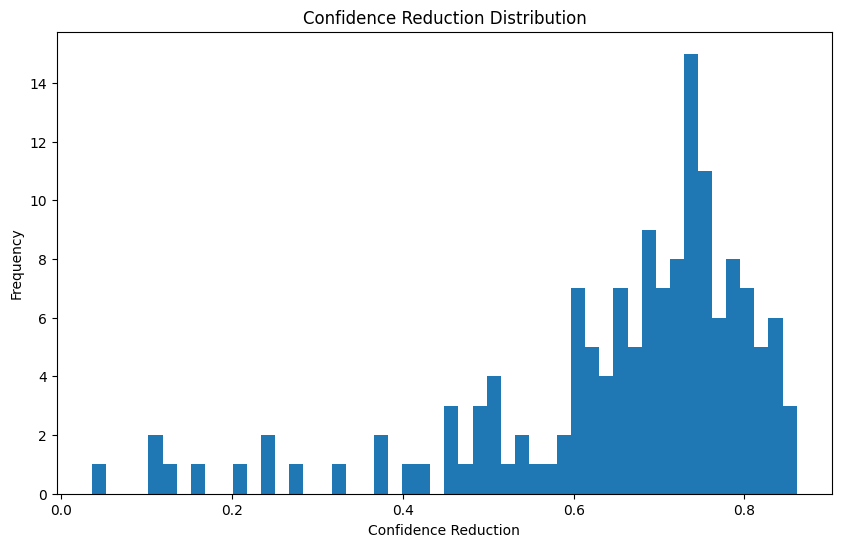

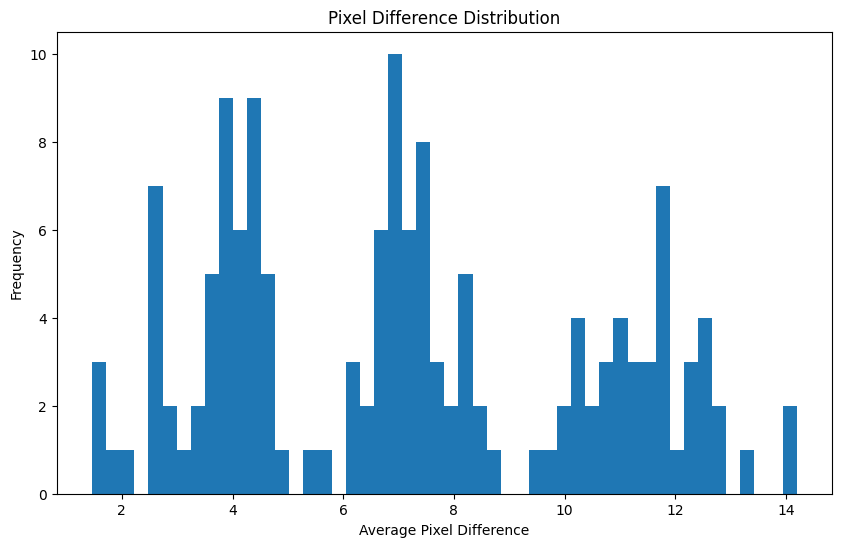

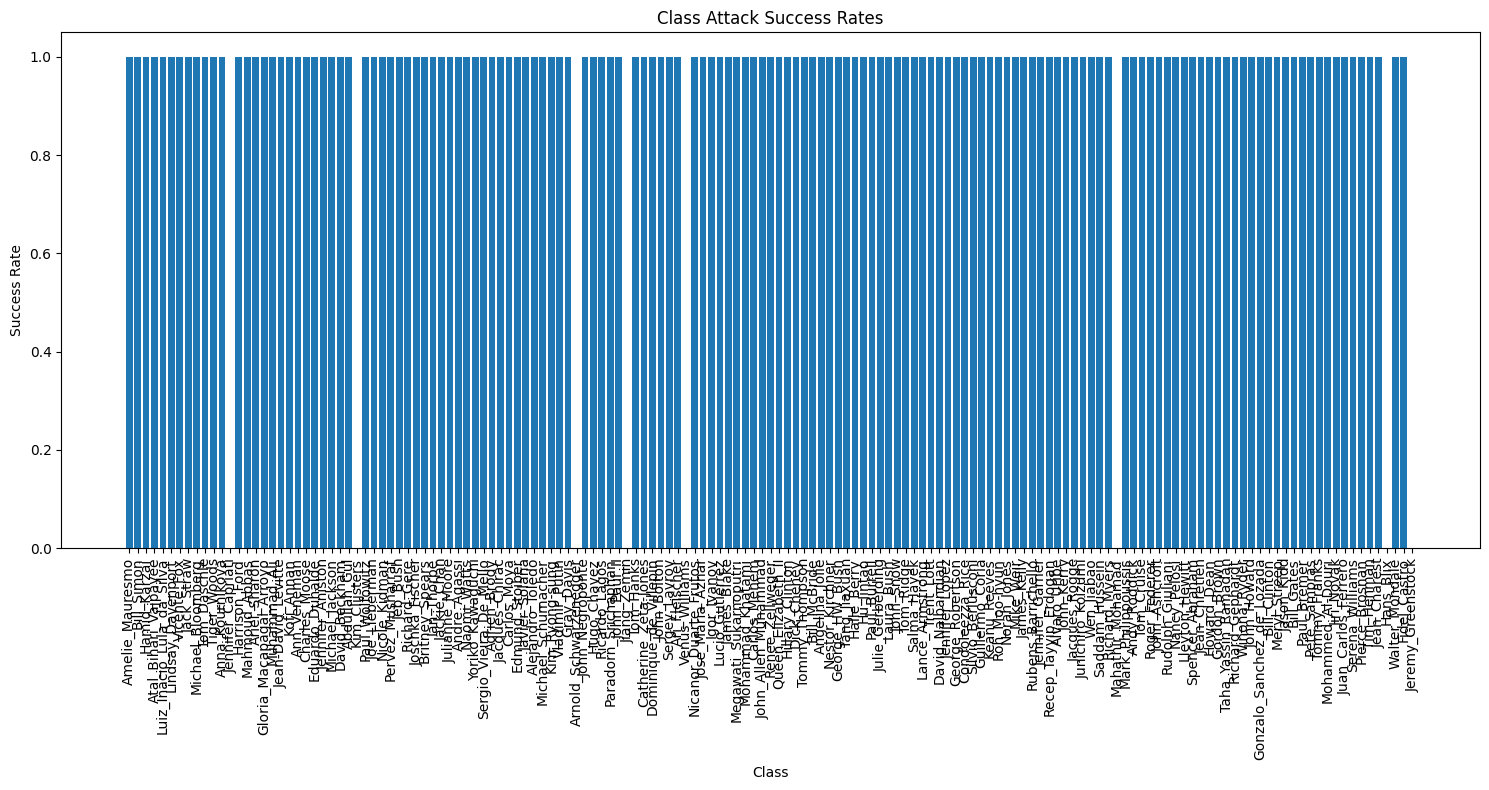


Attack complete! Final statistics:
Total images: 153
Successful attacks: 145
Success rate: 94.77%
Average confidence reduction: 0.656
Average pixel difference: 7.19
Total processing time: 0.20 hours
Average time per image: 4.7 seconds

Class success rate statistics:
Amelie_Mauresmo: 100.00% (1/1)
Bill_Simon: 100.00% (1/1)
Hamid_Karzai: 100.00% (1/1)
Atal_Bihari_Vajpayee: 100.00% (1/1)
Luiz_Inacio_Lula_da_Silva: 100.00% (1/1)
Lindsay_Davenport: 100.00% (1/1)
Vicente_Fox: 100.00% (1/1)
Jack_Straw: 100.00% (1/1)
Michael_Bloomberg: 100.00% (1/1)
Tom_Daschle: 100.00% (1/1)


In [ ]:
def execute_sampled_attack():
    # Set paths
    source_dir = "/content/datasets/processed_dataset"
    output_dir = "/content/attacked_dataset_random"
    stats_dir = os.path.join(output_dir, "attack_stats")

    # Create necessary directories
    os.makedirs(output_dir, exist_ok=True)
    os.makedirs(stats_dir, exist_ok=True)

    # Sample the dataset
    sampled_images = sample_dataset(source_dir, samples_per_class=1)

    # Create the sticker bank
    print("Creating sticker bank...")
    sticker_bank = []
    for class_folder in os.listdir(source_dir):
        folder_path = os.path.join(source_dir, class_folder)
        if os.path.isdir(folder_path):
            image_files = os.listdir(folder_path)
            if image_files:
                # Randomly select an image from each class as a sticker
                img_path = os.path.join(folder_path, random.choice(image_files))
                try:
                    img = Image.open(img_path).convert('RGB')
                    sticker_bank.append(img)
                except Exception as e:
                    print(f"Unable to load sticker image {img_path}: {e}")
                    continue

    print(f"Sticker bank size: {len(sticker_bank)} images")

    # Initialize the attacker
    attacker = StickerAttack(model, device=device)

    # Statistics
    stats = {
        'total_images': 0,
        'successful_attacks': 0,
        'confidence_reductions': [],
        'pixel_differences': [],
        'class_changes': {},
        'processing_times': [],
        'original_predictions': {},
        'attacked_predictions': {},
        'class_success_rates': defaultdict(lambda: {'total': 0, 'success': 0})
    }

    # Process the sampled images
    print("\nProcessing sampled dataset...")
    total_start_time = time.time()

    # Create progress bar
    pbar = tqdm(sampled_images, desc="Processing images")

    for img_path, class_name in pbar:
        try:
            # Create output path
            relative_path = os.path.relpath(img_path, source_dir)
            output_path = os.path.join(output_dir, relative_path)
            os.makedirs(os.path.dirname(output_path), exist_ok=True)

            # Load the image
            image = Image.open(img_path).convert('RGB')

            # Record start time
            start_time = time.time()

            # Execute the attack
            best_attack, original_pred = attacker.attack(image, sticker_bank)

            # Record processing time
            process_time = time.time() - start_time
            stats['processing_times'].append(process_time)

            # Update statistics
            stats['total_images'] += 1
            stats['class_success_rates'][class_name]['total'] += 1

            # Record original prediction
            stats['original_predictions'][original_pred] = \
                stats['original_predictions'].get(original_pred, 0) + 1

            if best_attack is not None:
                attacked_img, pred_class, confidence = best_attack

                # Save the attacked image
                attacked_img.save(output_path)

                # Calculate confidence reduction
                original_conf = attacker.evaluate_attack(image, original_pred)[2]
                conf_reduction = original_conf - confidence
                stats['confidence_reductions'].append(conf_reduction)

                # Calculate pixel difference
                pixel_diff = np.abs(np.array(image) - np.array(attacked_img)).mean()
                stats['pixel_differences'].append(pixel_diff)

                # Record class change
                class_change = f"{original_pred}->{pred_class}"
                stats['class_changes'][class_change] = \
                    stats['class_changes'].get(class_change, 0) + 1

                # Record attacked prediction
                stats['attacked_predictions'][pred_class] = \
                    stats['attacked_predictions'].get(pred_class, 0) + 1

                stats['successful_attacks'] += 1
                stats['class_success_rates'][class_name]['success'] += 1

                # Update progress bar description
                success_rate = stats['successful_attacks'] / stats['total_images']
                avg_conf_reduction = np.mean(stats['confidence_reductions'])
                avg_pixel_diff = np.mean(stats['pixel_differences'])
                avg_time = np.mean(stats['processing_times'])

                pbar.set_description(
                    f"Success Rate: {success_rate:.2%} | "
                    f"Avg Confidence Reduction: {avg_conf_reduction:.3f} | "
                    f"Avg Pixel Difference: {avg_pixel_diff:.2f} | "
                    f"Avg Time: {avg_time:.1f}s"
                )
            else:
                # Attack failed, copy the original image
                shutil.copy2(img_path, output_path)

        except Exception as e:
            print(f"\nFailed to process image {img_path}: {e}")
            continue

    total_time = time.time() - total_start_time

    # Calculate success rate for each class
    class_success_stats = {}
    for class_name, results in stats['class_success_rates'].items():
        if results['total'] > 0:
            success_rate = results['success'] / results['total']
            class_success_stats[class_name] = {
                'success_rate': success_rate,
                'total_attempts': results['total'],
                'successful_attacks': results['success']
            }

    # Save detailed statistics
    print("\nSaving statistics...")
    stats['total_time'] = total_time
    stats['average_time_per_image'] = total_time / stats['total_images']
    stats['success_rate'] = stats['successful_attacks'] / stats['total_images']
    stats['class_success_stats'] = class_success_stats

    if stats['successful_attacks'] > 0:
        stats['average_confidence_reduction'] = np.mean(stats['confidence_reductions'])
        stats['average_pixel_difference'] = np.mean(stats['pixel_differences'])

    # Save statistics to a JSON file
    with open(os.path.join(stats_dir, 'attack_statistics.json'), 'w') as f:
        json.dump(stats, f, indent=4)

    # Create visualizations
    print("Generating visualizations...")

    # 1. Confidence reduction distribution
    if stats['confidence_reductions']:
        plt.figure(figsize=(10, 6))
        plt.hist(stats['confidence_reductions'], bins=50)
        plt.title('Confidence Reduction Distribution')
        plt.xlabel('Confidence Reduction')
        plt.ylabel('Frequency')
        plt.show()
        plt.close()

    # 2. Pixel difference distribution
    if stats['pixel_differences']:
        plt.figure(figsize=(10, 6))
        plt.hist(stats['pixel_differences'], bins=50)
        plt.title('Pixel Difference Distribution')
        plt.xlabel('Average Pixel Difference')
        plt.ylabel('Frequency')
        plt.show()
        plt.close()

    # 3. Class success rate comparison
    plt.figure(figsize=(15, 8))
    class_names = list(class_success_stats.keys())
    success_rates = [stats['success_rate'] for stats in class_success_stats.values()]
    plt.bar(range(len(class_names)), success_rates)
    plt.xticks(range(len(class_names)), class_names, rotation=90)
    plt.title('Class Attack Success Rates')
    plt.xlabel('Class')
    plt.ylabel('Success Rate')
    plt.tight_layout()
    plt.show()
    plt.close()

    # Print final statistics
    print("\nAttack complete! Final statistics:")
    print(f"Total images: {stats['total_images']}")
    print(f"Successful attacks: {stats['successful_attacks']}")
    print(f"Success rate: {stats['success_rate']:.2%}")
    if stats['successful_attacks'] > 0:
        print(f"Average confidence reduction: {stats['average_confidence_reduction']:.3f}")
        print(f"Average pixel difference: {stats['average_pixel_difference']:.2f}")
    print(f"Total processing time: {total_time/3600:.2f} hours")
    print(f"Average time per image: {stats['average_time_per_image']:.1f} seconds")

    # Print class success rate statistics
    print("\nClass success rate statistics:")
    sorted_classes = sorted(class_success_stats.items(),
                            key=lambda x: x[1]['success_rate'],
                            reverse=True)
    for class_name, stats in sorted_classes[:10]:
        print(f"{class_name}: {stats['success_rate']:.2%} "
              f"({stats['successful_attacks']}/{stats['total_attempts']})")

    return stats

# Execute the sampled attack
if __name__ == "__main__":
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  model = model.to(device)
  stats = execute_sampled_attack()


# Sticker from self

The second type of sticker we adopt is a face recognition confrontation patch attack sticker based on adaptive features.

- Through precise positioning and feature saliency analysis of 68 facial key points, we achieve precise selection of sticker locations, and the size of the sticker can be adaptively adjusted to match the feature area, thereby improving the accuracy and concealment of the attack.
- We have designed a multi-level sticker enhancement process, including contrast adaptive adjustment, high-frequency random noise injection, image sharpening processing and color perturbation optimization, which significantly improves the visual feature expression ability of the patch and the stability of the attack.

- We use a patch fusion algorithm based on the gradient transparency channel, process the sticker edges through Gaussian blur, and add a gradient transparency transition mechanism to fully optimize the naturalness of the fusion between the patch and the original image and reduce the abruptness of the edges.

In [ ]:
def sample_dataset(source_dir, samples_per_class=10):
    """
    Sample a fixed number of images from each class.

    Args:
        source_dir: Root directory of the dataset.
        samples_per_class: Number of images to sample from each class.

    Returns:
        List of sampled image paths and their corresponding class names.
    """
    sampled_images = []
    class_counts = defaultdict(int)

    print("Sampling dataset...")

    # Get all classes
    classes = [d for d in os.listdir(source_dir)
               if os.path.isdir(os.path.join(source_dir, d))]
    print(f"Found {len(classes)} classes")

    # Randomly sample from each class
    for class_name in classes:
        class_dir = os.path.join(source_dir, class_name)
        images = [f for f in os.listdir(class_dir)
                  if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

        # If the number of images in the class is insufficient, use them all
        n_samples = min(samples_per_class, len(images))
        selected_images = random.sample(images, n_samples)

        for img_name in selected_images:
            img_path = os.path.join(class_dir, img_name)
            sampled_images.append((img_path, class_name))
            class_counts[class_name] += 1

    print(f"Total sampled {len(sampled_images)} images")
    print(f"Average {np.mean(list(class_counts.values())):.1f} images per class")

    return sampled_images

class SelfStickerAttack:
    def __init__(self, model, device='cuda' if torch.cuda.is_available() else 'cpu'):
        self.model = model.to(device)
        self.device = device
        self.transform = transforms.Compose([
            transforms.Resize((160, 160)),
            transforms.ToTensor(),
            transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
        ])

    def extract_stickers(self, image, num_stickers=5, min_size=32, max_size=64):
        """Extract multiple stickers from the original image."""
        width, height = image.size
        stickers = []
        positions = []

        # Calculate the salient regions of the image
        img_array = np.array(image)
        gray = cv2.cvtColor(img_array, cv2.COLOR_RGB2GRAY)
        saliency = cv2.Laplacian(gray, cv2.CV_64F).var()  # Calculate saliency
        edges = cv2.Canny(gray, 100, 200)  # Edge detection

        for _ in range(num_stickers):
            # Randomly choose sticker size
            w = random.randint(min_size, max_size)
            h = random.randint(min_size, max_size)

            # Attempt to find the best position
            best_score = float('-inf')
            best_pos = None
            best_sticker = None

            # Try multiple times to find the best position
            for _ in range(10):
                x = random.randint(0, width - w)
                y = random.randint(0, height - h)

                # Evaluate the area
                region_edges = edges[y:y+h, x:x+w]
                region_saliency = saliency[y:y+h, x:x+w] if isinstance(saliency, np.ndarray) else saliency

                # Calculate area score (edge diversity and saliency)
                score = np.mean(region_edges) + (region_saliency if isinstance(region_saliency, (int, float)) else np.mean(region_saliency))

                if score > best_score:
                    best_score = score
                    best_pos = (x, y, w, h)
                    best_sticker = image.crop((x, y, x + w, y + h))

            if best_sticker is not None:
                # Enhance the sticker
                enhanced_sticker = self.enhance_sticker(best_sticker)
                stickers.append(enhanced_sticker)
                positions.append(best_pos)

        return stickers, positions

    def enhance_sticker(self, sticker):
        """Enhance the adversarial nature of the sticker."""
        # Convert to numpy array
        sticker_array = np.array(sticker)

        # Increase contrast
        enhanced = cv2.convertScaleAbs(sticker_array, alpha=1.5, beta=0)

        # Add high-frequency noise
        noise = np.random.normal(0, 25, sticker_array.shape).astype(np.int32)
        enhanced = np.clip(enhanced + noise, 0, 255).astype(np.uint8)

        # Sharpening
        kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
        enhanced = cv2.filter2D(enhanced, -1, kernel)

        # Color perturbation
        for c in range(3):
            channel = enhanced[:,:,c]
            channel = channel + np.random.uniform(-20, 20)
            enhanced[:,:,c] = np.clip(channel, 0, 255)

        return Image.fromarray(enhanced)

    def apply_sticker(self, image, sticker, position, blend_alpha=0.8):
        """Apply the sticker to the image."""
        x, y, w, h = position
        result = np.array(image).astype(np.float32)
        sticker_array = np.array(sticker).astype(np.float32)

        # Create gradient alpha channel
        alpha = np.ones((h, w), dtype=np.float32) * blend_alpha
        fade_width = 5

        # Edge gradient
        for i in range(fade_width):
            factor = i / fade_width
            alpha[i,:] *= factor
            alpha[-(i+1),:] *= factor
            alpha[:,i] *= factor
            alpha[:,-(i+1)] *= factor

        alpha = cv2.GaussianBlur(alpha, (3, 3), 0)
        alpha = alpha[..., np.newaxis]

        # Blend sticker
        blend_region = result[y:y+h, x:x+w] * (1 - alpha) + sticker_array * alpha
        result[y:y+h, x:x+w] = blend_region

        return Image.fromarray(np.clip(result, 0, 255).astype(np.uint8))

    def attack(self, image):
        """Execute the attack."""
        self.model.eval()
        # Get original prediction
        with torch.no_grad():
            input_tensor = self.transform(image).unsqueeze(0).to(self.device)
            original_pred = torch.argmax(self.model(input_tensor), dim=1).item()
            original_conf = F.softmax(self.model(input_tensor), dim=1)[0, original_pred].item()

        best_attack = None
        best_confidence = 1.0

        # Try different sticker combinations
        for _ in range(10):  # Multiple attempts
            # Extract stickers
            stickers, positions = self.extract_stickers(image)

            # Attempt stickers one by one
            attacked_img = image
            for sticker, pos in zip(stickers, positions):
                attacked_img = self.apply_sticker(attacked_img, sticker, pos)

            # Evaluate the attack effect
            with torch.no_grad():
                input_tensor = self.transform(attacked_img).unsqueeze(0).to(self.device)
                output = self.model(input_tensor)
                prob = F.softmax(output, dim=1)
                pred_class = torch.argmax(output, dim=1).item()
                confidence = prob[0][pred_class].item()

                if pred_class != original_pred and confidence < best_confidence:
                    best_attack = (attacked_img, pred_class, confidence)
                    best_confidence = confidence

        return best_attack, original_pred

    def evaluate_attack(self, image, original_pred):
        """
        Evaluate the attack effect.
        """
        self.model.eval()
        with torch.no_grad():
            input_tensor = self.transform(image).unsqueeze(0).to(self.device)
            output = self.model(input_tensor)
            prob = F.softmax(output, dim=1)
            pred_class = torch.argmax(output, dim=1).item()
            confidence = prob[0][pred_class].item()

        return pred_class != original_pred, pred_class, confidence


def execute_sampled_attack():
    # Set paths
    source_dir = "/content/datasets/processed_dataset"
    output_dir = "/content/attacked_dataset_selfattack"
    stats_dir = os.path.join(output_dir, "attack_stats")

    # Create directories
    os.makedirs(output_dir, exist_ok=True)
    os.makedirs(stats_dir, exist_ok=True)

    # Sample dataset
    sampled_images = sample_dataset(source_dir, samples_per_class=1)

    # Initialize attacker and statistics
    attacker = SelfStickerAttack(model, device=device)
    stats = {
        'total_images': 0,
        'successful_attacks': 0,
        'confidence_reductions': [],
        'pixel_differences': [],
        'class_changes': defaultdict(int),  # 改用defaultdict
        'processing_times': [],
        'class_success_rates': defaultdict(lambda: {'total': 0, 'success': 0})
    }

    # Process images
    print("\nStarting to process images...")
    pbar = tqdm(sampled_images)

    for img_path, class_name in pbar:
        try:
            # Set output path
            relative_path = os.path.relpath(img_path, source_dir)
            output_path = os.path.join(output_dir, relative_path)
            os.makedirs(os.path.dirname(output_path), exist_ok=True)

            # Load image
            image = Image.open(img_path).convert("RGB")
            stats['total_images'] += 1
            stats['class_success_rates'][class_name]['total'] += 1

            # Execute attack
            start_time = time.time()
            attack_result, original_pred = attacker.attack(image)
            processing_time = time.time() - start_time
            stats['processing_times'].append(processing_time)

            # Get original confidence
            with torch.no_grad():
                input_tensor = attacker.transform(image).unsqueeze(0).to(device)
                original_output = attacker.model(input_tensor)
                original_conf = F.softmax(original_output, dim=1)[0][original_pred].item()

            # Handle attack result
            if attack_result is not None:
                attacked_image, pred_class, confidence = attack_result

                # Save attacked image
                attacked_image.save(output_path)

                # Calculate pixel difference
                pixel_diff = np.abs(np.array(image) - np.array(attacked_image)).mean()
                stats['pixel_differences'].append(pixel_diff)

                if original_pred != pred_class:
                    stats['successful_attacks'] += 1
                    stats['confidence_reductions'].append(original_conf - confidence)
                    stats['class_changes'][f"{original_pred}->{pred_class}"] += 1
                    stats['class_success_rates'][class_name]['success'] += 1
            else:
                # If attack failed, copy original image
                shutil.copy2(img_path, output_path)

            # Update progress bar
            success_rate = stats['successful_attacks'] / stats['total_images']
            avg_conf_reduction = np.mean(stats['confidence_reductions']) if stats['confidence_reductions'] else 0
            pbar.set_description(
                f"Success Rate: {success_rate:.2%} | "
                f"Avg Conf Reduction: {avg_conf_reduction:.3f} | "
                f"Time: {processing_time:.2f}s"
            )

        except Exception as e:
            print(f"Error processing {img_path}: {e}")
            if os.path.exists(img_path):
                # Create output directory if it doesn't exist
                os.makedirs(os.path.dirname(output_path), exist_ok=True)
                # Copy original image on error
                shutil.copy2(img_path, output_path)
            continue

    # Calculate final statistics
    final_stats = {
        'total_images': stats['total_images'],
        'successful_attacks': stats['successful_attacks'],
        'success_rate': stats['successful_attacks'] / stats['total_images'] if stats['total_images'] > 0 else 0,
        'average_confidence_reduction': np.mean(stats['confidence_reductions']) if stats['confidence_reductions'] else 0,
        'average_pixel_difference': np.mean(stats['pixel_differences']) if stats['pixel_differences'] else 0,
        'class_success_rates': dict(stats['class_success_rates']),
        'most_common_changes': sorted(stats['class_changes'].items(), key=lambda x: x[1], reverse=True)[:10]
    }

    # Save statistics
    with open(os.path.join(stats_dir, 'attack_statistics.json'), 'w') as f:
        json.dump(final_stats, f, indent=4)

    # Print summary
    print("\nAttack Summary:")
    print(f"Total images processed: {final_stats['total_images']}")
    print(f"Successful attacks: {final_stats['successful_attacks']}")
    print(f"Success rate: {final_stats['success_rate']:.2%}")
    print(f"Average confidence reduction: {final_stats['average_confidence_reduction']:.4f}")

    return final_stats



if __name__ == "__main__":
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  model = model.to(device)
  stats = execute_sampled_attack()

Sampling dataset...
Found 153 classes
Total sampled 153 images
Average 1.0 images per class

Starting to process images...


Success Rate: 70.59% | Avg Conf Reduction: 0.601 | Time: 0.28s: 100%|██████████| 153/153 [00:56<00:00,  2.70it/s]


Attack Summary:
Total images processed: 153
Successful attacks: 108
Success rate: 70.59%
Average confidence reduction: 0.6013


# one pic test

Finally, we used a physical world attack based on PNG stickers. In terms of sticker selection, we chose tattoo stickers that are common in life. We believe that tattoo stickers have been widely accepted by the public, and they are placed on the face or other parts. It will not attract too much attention from people. Compared with the stickers selected in the original theory, it is more practical and concealable, and can maximize the naturalness and effectiveness of the attack.

Starting attack on image: /content/datasets/processed_dataset/Amelie_Mauresmo/1_Amelie_Mauresmo_0001.jpg
Original predicted class: 4, Confidence: 0.999
Progress: 272/272 Current Position: Inner Lower Lip Point 67 Size: 25x25
Attack completed!


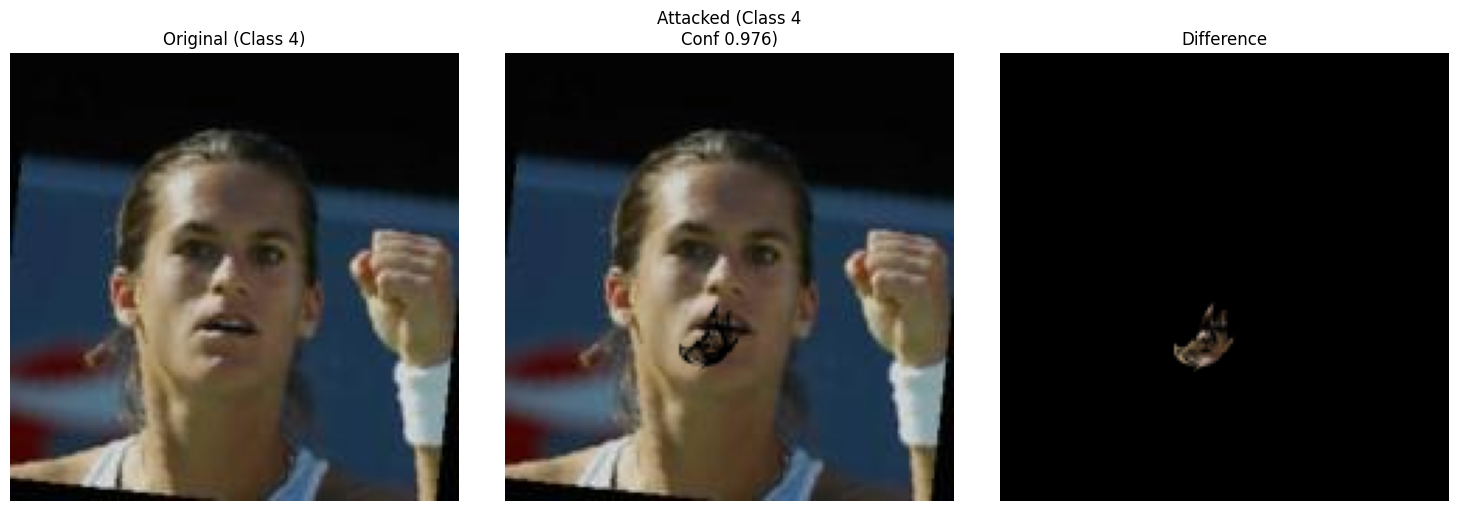


Final attack results:
Original Class: 4
Attacked Class: 4


In [ ]:
class FaceTargetedAttack:
    def __init__(self, model, device='cuda' if torch.cuda.is_available() else 'cpu'):
        self.model = model.to(device)
        self.device = device
        self.transform = transforms.Compose([
            transforms.Resize((160, 160)),
            transforms.ToTensor(),
            transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
        ])

        # Initialize the face detector and landmark detector
        self.face_detector = dlib.get_frontal_face_detector()
        self.landmark_detector = dlib.shape_predictor("/content/facial-detection/dataset/shape_predictor_68_face_landmarks.dat")

        # Define face region names
        self.face_regions = {
            range(0, 17): "Chin",
            range(17, 22): "Left Eyebrow",
            range(22, 27): "Right Eyebrow",
            range(27, 31): "Nose Bridge",
            range(31, 36): "Nose",
            range(36, 42): "Left Eye",
            range(42, 48): "Right Eye",
            range(48, 54): "Outer Upper Lip",
            range(54, 60): "Outer Lower Lip",
            range(60, 65): "Inner Upper Lip",
            range(65, 68): "Inner Lower Lip"
        }

    def get_face_landmarks(self, image):
        """Get all face landmarks"""
        img_array = np.array(image)
        gray = cv2.cvtColor(img_array, cv2.COLOR_RGB2GRAY)
        faces = self.face_detector(gray)

        all_landmarks = []
        for face in faces:
            landmarks = self.landmark_detector(gray, face)
            points = [(p.x, p.y) for p in landmarks.parts()]
            all_landmarks.append(points)
        return all_landmarks

    def evaluate_attack(self, image, original_pred=None):
        """Evaluate attack effectiveness"""
        self.model.eval()
        with torch.no_grad():
            input_tensor = self.transform(image).unsqueeze(0).to(self.device)
            output = self.model(input_tensor)
            prob = F.softmax(output, dim=1)
            pred_class = torch.argmax(output, dim=1).item()
            confidence = prob[0][pred_class].item()

            if original_pred is None:
                return pred_class, confidence, confidence
            return pred_class != original_pred, pred_class, confidence

    def apply_sticker(self, image, sticker, position):
        """Apply PNG sticker to the image"""
        x, y = position
        w, h = sticker.size

        # Ensure coordinates are within the image bounds
        x = max(0, min(x - w//2, image.size[0] - w))
        y = max(0, min(y - h//2, image.size[1] - h))

        image_array = np.array(image).astype(np.float32)

        if sticker.mode == 'RGBA':
            sticker_array = np.array(sticker)
            rgb = sticker_array[..., :3].astype(np.float32)
            alpha = sticker_array[..., 3].astype(np.float32) / 255.0
        else:
            rgb = np.array(sticker).astype(np.float32)
            alpha = np.ones((h, w), dtype=np.float32)

        alpha = alpha[..., np.newaxis]

        try:
            blend_region = image_array[y:y+h, x:x+w] * (1 - alpha) + rgb * alpha
            image_array[y:y+h, x:x+w] = blend_region
        except Exception as e:
            print(f"Failed to blend sticker: {e}")
            return image

        return Image.fromarray(np.clip(image_array, 0, 255).astype(np.uint8))

    def attack(self, image_path, sticker_list):
        """Execute a comprehensive face landmark attack"""
        if isinstance(image_path, str):
            image = Image.open(image_path).convert('RGB')
        else:
            image = image_path

        sticker = sticker_list[0]
        landmarks_list = self.get_face_landmarks(image)

        if not landmarks_list:
            print("No face detected")
            return None, None

        # Get original prediction
        self.model.eval()
        with torch.no_grad():
            input_tensor = self.transform(image).unsqueeze(0).to(self.device)
            original_pred = torch.argmax(self.model(input_tensor), dim=1).item()
            original_conf = F.softmax(self.model(input_tensor), dim=1)[0, original_pred].item()

        print(f"Original predicted class: {original_pred}, Confidence: {original_conf:.3f}")

        best_attack = None
        best_confidence = 1.0
        last_attempt = None
        attack_results = []  # Record all attack results

        # Sticker sizes
        sticker_sizes = [(10, 10), (15, 15), (20, 20), (25, 25)]

        total_attempts = len(landmarks_list) * len(sticker_sizes) * 68  # 68 landmarks
        current_attempt = 0

        for landmarks in landmarks_list:
            # Iterate over all landmarks
            for i, point in enumerate(landmarks):
                # Get the region name for the current point
                region_name = "Others"
                for range_obj, name in self.face_regions.items():
                    if i in range_obj:
                        region_name = name
                        break

                # Try different sticker sizes
                for w, h in sticker_sizes:
                    current_attempt += 1
                    print(f"\rProgress: {current_attempt}/{total_attempts} "
                          f"Current Position: {region_name} Point {i} "
                          f"Size: {w}x{h}", end="")

                    resized_sticker = sticker.resize((w, h))
                    attacked_img = self.apply_sticker(image, resized_sticker, point)

                    # Evaluate attack effectiveness
                    with torch.no_grad():
                        input_tensor = self.transform(attacked_img).unsqueeze(0).to(self.device)
                        output = self.model(input_tensor)
                        prob = F.softmax(output, dim=1)
                        pred_class = torch.argmax(output, dim=1).item()
                        confidence = prob[0][pred_class].item()

                        # Record each attempt's result
                        result = {
                            'region': region_name,
                            'point_index': i,
                            'size': (w, h),
                            'position': point,
                            'pred_class': pred_class,
                            'confidence': confidence,
                            'success': pred_class != original_pred,
                            'image': attacked_img
                        }
                        attack_results.append(result)

                        last_attempt = (attacked_img, pred_class, confidence)

                        if pred_class != original_pred:
                            if confidence < best_confidence:
                                best_attack = (attacked_img, pred_class, confidence)
                                best_confidence = confidence
                                print(f"\nFound a better attack - Position: {region_name} Point {i}, "
                                      f"Size: {w}x{h}, "
                                      f"New Class: {pred_class}, "
                                      f"Confidence: {confidence:.3f}")

                                # Save current best result
                                attacked_img.save("/content/best_attack.jpg")

        print("\nAttack completed!")

        # Save statistics for all attack results
        successful_attacks = [r for r in attack_results if r['success']]
        if successful_attacks:
            print("\nStatistics of successful attack locations:")
            for region in set(r['region'] for r in successful_attacks):
                region_attacks = [r for r in successful_attacks if r['region'] == region]
                avg_conf = np.mean([r['confidence'] for r in region_attacks])
                print(f"{region}: {len(region_attacks)} successful attempts, Average Confidence: {avg_conf:.3f}")

        return best_attack if best_attack is not None else last_attempt, original_pred

def test_face_attack():
    """Test comprehensive face landmark attack"""
    image_path = '/content/datasets/processed_dataset/Amelie_Mauresmo/1_Amelie_Mauresmo_0001.jpg'
    sticker_path = "/content/bg.png"
    output_path = "/content/face_simple.jpg"

    sticker = Image.open(sticker_path)
    attacker = FaceTargetedAttack(model, device=device)

    print(f"Starting attack on image: {image_path}")
    result, original_pred = attacker.attack(image_path, [sticker])

    if result is not None:
        attacked_img, pred_class, confidence = result

        # Save final result
        attacked_img.save(output_path)

        # Display results
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 3, 1)
        plt.imshow(Image.open(image_path))
        plt.title(f"Original (Class {original_pred})")
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(attacked_img)
        plt.title(f"Attacked (Class {pred_class}\nConf {confidence:.3f})")
        plt.axis('off')

        plt.subplot(1, 3, 3)
        diff = np.abs(np.array(attacked_img).astype(float) -
                     np.array(Image.open(image_path)).astype(float))
        plt.imshow(diff.astype(np.uint8))
        plt.title("Difference")
        plt.axis('off')

        plt.tight_layout()
        plt.show()

        print("\nFinal attack results:")
        print(f"Original Class: {original_pred}")
        print(f"Attacked Class: {pred_class}")

if __name__ == "__main__":
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  model = model.to(device)
  test_face_attack()

# FULL dataset attack

In [ ]:
def execute_face_targeted_attack(output_dir, sticker_path):
    """Execute face-targeted attack on sampled dataset"""
    # Setup paths
    source_dir = "/content/datasets/processed_dataset"
    output_dir = output_dir
    stats_dir = os.path.join(output_dir, "attack_stats")
    sticker_path = sticker_path

    # Create directories
    os.makedirs(output_dir, exist_ok=True)
    os.makedirs(stats_dir, exist_ok=True)

    # Load sticker
    print("Loading sticker...")
    sticker = Image.open(sticker_path)

    # Sample dataset (1 image per class)
    sampled_images = sample_dataset(source_dir, samples_per_class=1)

    # Initialize attacker
    attacker = FaceTargetedAttack(model, device=device)

    # Statistics
    stats = {
        'total_images': 0,
        'faces_detected': 0,
        'successful_attacks': 0,
        'confidence_reductions': [],
        'pixel_differences': [],
        'successful_regions': defaultdict(int),
        'class_changes': defaultdict(int),
        'processing_times': [],
        'class_success_rates': defaultdict(lambda: {'total': 0, 'success': 0}),
        'best_attacks': []
    }

    # Process images
    print("\nStarting attack process...")
    pbar = tqdm(sampled_images)

    for img_path, class_name in pbar:
        try:
            # Setup output path
            relative_path = os.path.relpath(img_path, source_dir)
            output_path = os.path.join(output_dir, relative_path)
            os.makedirs(os.path.dirname(output_path), exist_ok=True)

            stats['total_images'] += 1
            stats['class_success_rates'][class_name]['total'] += 1

            # Execute attack
            start_time = time.time()
            attack_result, original_pred = attacker.attack(img_path, [sticker])
            process_time = time.time() - start_time
            stats['processing_times'].append(process_time)

            if attack_result is not None:
                attacked_img, pred_class, confidence = attack_result

                # Get original confidence
                image = Image.open(img_path).convert('RGB')
                original_conf = attacker.evaluate_attack(image, original_pred)[2]

                # Save attacked image
                attacked_img.save(output_path)

                # Update statistics
                if pred_class != original_pred:
                    stats['successful_attacks'] += 1
                    stats['class_success_rates'][class_name]['success'] += 1

                    conf_reduction = original_conf - confidence
                    pixel_diff = np.abs(np.array(image) - np.array(attacked_img)).mean()

                    stats['confidence_reductions'].append(conf_reduction)
                    stats['pixel_differences'].append(pixel_diff)
                    stats['class_changes'][f"{original_pred}->{pred_class}"] += 1

                    # Record successful attack
                    attack_info = {
                        'image_path': img_path,
                        'class_name': class_name,
                        'original_class': original_pred,
                        'new_class': pred_class,
                        'confidence_reduction': conf_reduction,
                        'pixel_difference': pixel_diff
                    }
                    stats['best_attacks'].append(attack_info)

                # Update progress bar
                success_rate = stats['successful_attacks'] / stats['total_images']
                avg_conf_reduction = np.mean(stats['confidence_reductions']) if stats['confidence_reductions'] else 0

                pbar.set_description(
                    f"Success Rate: {success_rate:.2%} | "
                    f"Avg Conf Reduction: {avg_conf_reduction:.3f}"
                )
            else:
                # Copy original image if attack fails
                shutil.copy2(img_path, output_path)

        except Exception as e:
            print(f"\nError processing {img_path}: {e}")
            if os.path.exists(img_path):
                shutil.copy2(img_path, output_path)
            continue

    # Calculate final statistics
    final_stats = {
        'total_images': stats['total_images'],
        'successful_attacks': stats['successful_attacks'],
        'success_rate': stats['successful_attacks'] / stats['total_images'],
        'average_confidence_reduction': np.mean(stats['confidence_reductions']) if stats['confidence_reductions'] else 0,
        'average_pixel_difference': np.mean(stats['pixel_differences']) if stats['pixel_differences'] else 0,
        'average_processing_time': np.mean(stats['processing_times']),
        'most_common_changes': sorted(stats['class_changes'].items(),
                                    key=lambda x: x[1],
                                    reverse=True)[:10],
        'best_attacks': sorted(stats['best_attacks'],
                             key=lambda x: x['confidence_reduction'],
                             reverse=True)[:10]
    }

    # Save statistics
    with open(os.path.join(stats_dir, 'face_attack_statistics.json'), 'w') as f:
        json.dump(final_stats, f, indent=4)

    # Create visualizations
    if stats['confidence_reductions']:
        # 1. Confidence Reduction Distribution
        plt.figure(figsize=(10, 6))
        plt.hist(stats['confidence_reductions'], bins=30)
        plt.title('Distribution of Confidence Reduction')
        plt.xlabel('Confidence Reduction')
        plt.ylabel('Frequency')
        plt.savefig(os.path.join(stats_dir, 'confidence_reduction_dist.png'))
        plt.close()

        # 2. Pixel Difference Distribution
        plt.figure(figsize=(10, 6))
        plt.hist(stats['pixel_differences'], bins=30)
        plt.title('Distribution of Pixel Differences')
        plt.xlabel('Average Pixel Difference')
        plt.ylabel('Frequency')
        plt.savefig(os.path.join(stats_dir, 'pixel_difference_dist.png'))
        plt.close()

    # Print final report
    print("\nAttack Summary:")
    print("-" * 50)
    print(f"Total images processed: {final_stats['total_images']}")
    print(f"Successful attacks: {final_stats['successful_attacks']}")
    print(f"Success rate: {final_stats['success_rate']:.2%}")
    print(f"Average confidence reduction: {final_stats['average_confidence_reduction']:.4f}")
    print(f"Average pixel difference: {final_stats['average_pixel_difference']:.2f}")
    print(f"Average processing time: {final_stats['average_processing_time']:.2f} seconds")

    print("\nMost Common Class Changes:")
    for change, count in final_stats['most_common_changes']:
        print(f"{change}: {count} times")

    print("\nBest Attacks:")
    for i, attack in enumerate(final_stats['best_attacks'][:5], 1):
        print(f"\n{i}. Image: {attack['image_path']}")
        print(f"   Class: {attack['class_name']}")
        print(f"   Original -> New Class: {attack['original_class']} -> {attack['new_class']}")
        print(f"   Confidence Reduction: {attack['confidence_reduction']:.3f}")

    return final_stats

# Execute attack
if __name__ == "__main__":
    stats = execute_face_targeted_attack("/content/attacked_face_png1", "/content/bg1.png")


Loading sticker...
Sampling dataset...
Found 153 classes
Total sampled 153 images
Average 1.0 images per class

Starting attack process...


  0%|          | 0/153 [00:00<?, ?it/s]

Original predicted class: 4, Confidence: 0.997
Progress: 124/272 Current Position: Nose Bridge Point 30 Size: 25x25
Found a better attack - Position: Nose Bridge Point 30, Size: 25x25, New Class: 20, Confidence: 0.787
Progress: 125/272 Current Position: Nose Point 31 Size: 10x10
Found a better attack - Position: Nose Point 31, Size: 10x10, New Class: 20, Confidence: 0.413
Progress: 127/272 Current Position: Nose Point 31 Size: 20x20
Found a better attack - Position: Nose Point 31, Size: 20x20, New Class: 78, Confidence: 0.341
Progress: 131/272 Current Position: Nose Point 32 Size: 20x20
Found a better attack - Position: Nose Point 32, Size: 20x20, New Class: 20, Confidence: 0.339
Progress: 272/272 Current Position: Inner Lower Lip Point 67 Size: 25x25
Attack completed!

Statistics of successful attack locations:
Nose Bridge: 1 successful attempts, Average Confidence: 0.787
Inner Upper Lip: 1 successful attempts, Average Confidence: 0.549
Outer Upper Lip: 2 successful attempts, Average 

Success Rate: 100.00% | Avg Conf Reduction: 0.658:   1%|          | 1/153 [00:09<23:53,  9.43s/it]

Original predicted class: 17, Confidence: 1.000
Progress: 272/272 Current Position: Inner Lower Lip Point 67 Size: 25x25
Attack completed!


Success Rate: 50.00% | Avg Conf Reduction: 0.658:   1%|▏         | 2/153 [00:18<22:41,  9.02s/it]

Original predicted class: 39, Confidence: 1.000
Progress: 122/272 Current Position: Nose Bridge Point 30 Size: 15x15
Found a better attack - Position: Nose Bridge Point 30, Size: 15x15, New Class: 135, Confidence: 0.784
Progress: 135/272 Current Position: Nose Point 33 Size: 20x20
Found a better attack - Position: Nose Point 33, Size: 20x20, New Class: 135, Confidence: 0.736
Progress: 144/272 Current Position: Nose Point 35 Size: 25x25
Found a better attack - Position: Nose Point 35, Size: 25x25, New Class: 135, Confidence: 0.681
Progress: 270/272 Current Position: Inner Lower Lip Point 67 Size: 15x15

Success Rate: 66.67% | Avg Conf Reduction: 0.488:   2%|▏         | 3/153 [00:27<23:08,  9.26s/it]

Progress: 272/272 Current Position: Inner Lower Lip Point 67 Size: 25x25
Attack completed!

Statistics of successful attack locations:
Nose Bridge: 1 successful attempts, Average Confidence: 0.784
Nose: 2 successful attempts, Average Confidence: 0.708
Original predicted class: 13, Confidence: 1.000
Progress: 136/272 Current Position: Nose Point 33 Size: 25x25
Found a better attack - Position: Nose Point 33, Size: 25x25, New Class: 135, Confidence: 0.548
Progress: 272/272 Current Position: Inner Lower Lip Point 67 Size: 25x25
Attack completed!

Statistics of successful attack locations:
Nose: 4 successful attempts, Average Confidence: 0.777


Success Rate: 75.00% | Avg Conf Reduction: 0.476:   3%|▎         | 4/153 [00:37<23:26,  9.44s/it]

Original predicted class: 91, Confidence: 0.940
Progress: 419/544 Current Position: Left Eye Point 36 Size: 20x20
Found a better attack - Position: Left Eye Point 36, Size: 20x20, New Class: 128, Confidence: 0.853
Progress: 423/544 Current Position: Left Eye Point 37 Size: 20x20
Found a better attack - Position: Left Eye Point 37, Size: 20x20, New Class: 128, Confidence: 0.639
Progress: 435/544 Current Position: Left Eye Point 40 Size: 20x20
Found a better attack - Position: Left Eye Point 40, Size: 20x20, New Class: 128, Confidence: 0.573
Progress: 438/544 Current Position: Left Eye Point 41 Size: 15x15
Found a better attack - Position: Left Eye Point 41, Size: 15x15, New Class: 128, Confidence: 0.550
Progress: 544/544 Current Position: Inner Lower Lip Point 67 Size: 25x25

Success Rate: 80.00% | Avg Conf Reduction: 0.454:   3%|▎         | 5/153 [00:55<31:17, 12.68s/it]


Attack completed!

Statistics of successful attack locations:
Left Eye: 10 successful attempts, Average Confidence: 0.763
Inner Upper Lip: 5 successful attempts, Average Confidence: 0.768
Outer Upper Lip: 3 successful attempts, Average Confidence: 0.831
Original predicted class: 88, Confidence: 0.991
Progress: 98/272 Current Position: Right Eyebrow Point 24 Size: 15x15
Found a better attack - Position: Right Eyebrow Point 24, Size: 15x15, New Class: 74, Confidence: 0.352
Progress: 99/272 Current Position: Right Eyebrow Point 24 Size: 20x20
Found a better attack - Position: Right Eyebrow Point 24, Size: 20x20, New Class: 5, Confidence: 0.308
Progress: 188/272 Current Position: Right Eye Point 46 Size: 25x25
Found a better attack - Position: Right Eye Point 46, Size: 25x25, New Class: 74, Confidence: 0.231
Progress: 192/272 Current Position: Right Eye Point 47 Size: 25x25
Found a better attack - Position: Right Eye Point 47, Size: 25x25, New Class: 74, Confidence: 0.210
Progress: 272/27

Success Rate: 83.33% | Avg Conf Reduction: 0.520:   4%|▍         | 6/153 [01:05<28:26, 11.61s/it]


Attack completed!

Statistics of successful attack locations:
Right Eyebrow: 2 successful attempts, Average Confidence: 0.330
Nose Bridge: 1 successful attempts, Average Confidence: 0.641
Nose: 4 successful attempts, Average Confidence: 0.521
Right Eye: 4 successful attempts, Average Confidence: 0.314
Original predicted class: 147, Confidence: 0.995
Progress: 91/272 Current Position: Right Eyebrow Point 22 Size: 20x20
Found a better attack - Position: Right Eyebrow Point 22, Size: 20x20, New Class: 128, Confidence: 0.827
Progress: 92/272 Current Position: Right Eyebrow Point 22 Size: 25x25
Found a better attack - Position: Right Eyebrow Point 22, Size: 25x25, New Class: 128, Confidence: 0.820
Progress: 112/272 Current Position: Nose Bridge Point 27 Size: 25x25
Found a better attack - Position: Nose Bridge Point 27, Size: 25x25, New Class: 128, Confidence: 0.661
Progress: 115/272 Current Position: Nose Bridge Point 28 Size: 20x20
Found a better attack - Position: Nose Bridge Point 28, 

Success Rate: 85.71% | Avg Conf Reduction: 0.526:   5%|▍         | 7/153 [01:14<26:23, 10.84s/it]


Attack completed!

Statistics of successful attack locations:
Right Eyebrow: 3 successful attempts, Average Confidence: 0.823
Nose Bridge: 6 successful attempts, Average Confidence: 0.827
Left Eye: 1 successful attempts, Average Confidence: 0.755
Original predicted class: 48, Confidence: 1.000
Progress: 267/272 Current Position: Inner Lower Lip Point 66 Size: 20x20

Success Rate: 75.00% | Avg Conf Reduction: 0.526:   5%|▌         | 8/153 [01:23<24:26, 10.11s/it]

Progress: 272/272 Current Position: Inner Lower Lip Point 67 Size: 25x25
Attack completed!
Original predicted class: 97, Confidence: 1.000
Progress: 270/272 Current Position: Inner Lower Lip Point 67 Size: 15x15

Success Rate: 66.67% | Avg Conf Reduction: 0.526:   6%|▌         | 9/153 [01:32<23:53,  9.95s/it]

Progress: 272/272 Current Position: Inner Lower Lip Point 67 Size: 25x25
Attack completed!
Original predicted class: 140, Confidence: 1.000
Progress: 272/272 Current Position: Inner Lower Lip Point 67 Size: 25x25

Success Rate: 60.00% | Avg Conf Reduction: 0.526:   7%|▋         | 10/153 [01:42<23:25,  9.83s/it]


Attack completed!
Original predicted class: 137, Confidence: 0.999
Progress: 144/272 Current Position: Nose Point 35 Size: 25x25
Found a better attack - Position: Nose Point 35, Size: 25x25, New Class: 128, Confidence: 0.723
Progress: 272/272 Current Position: Inner Lower Lip Point 67 Size: 25x25
Attack completed!

Statistics of successful attack locations:
Nose: 1 successful attempts, Average Confidence: 0.723


Success Rate: 63.64% | Avg Conf Reduction: 0.490:   7%|▋         | 11/153 [01:50<22:11,  9.37s/it]

Original predicted class: 9, Confidence: 1.000
Progress: 268/272 Current Position: Inner Lower Lip Point 66 Size: 25x25

Success Rate: 58.33% | Avg Conf Reduction: 0.490:   8%|▊         | 12/153 [02:00<22:04,  9.39s/it]

Progress: 272/272 Current Position: Inner Lower Lip Point 67 Size: 25x25
Attack completed!
Original predicted class: 61, Confidence: 1.000
Progress: 268/272 Current Position: Inner Lower Lip Point 66 Size: 25x25

Success Rate: 53.85% | Avg Conf Reduction: 0.490:   8%|▊         | 13/153 [02:09<22:12,  9.51s/it]

Progress: 272/272 Current Position: Inner Lower Lip Point 67 Size: 25x25
Attack completed!
Original predicted class: 41, Confidence: 0.999
Progress: 272/272 Current Position: Inner Lower Lip Point 67 Size: 25x25
Attack completed!


Success Rate: 50.00% | Avg Conf Reduction: 0.490:   9%|▉         | 14/153 [02:18<21:30,  9.28s/it]

Original predicted class: 93, Confidence: 1.000
Progress: 271/272 Current Position: Inner Lower Lip Point 67 Size: 20x20

Success Rate: 46.67% | Avg Conf Reduction: 0.490:  10%|▉         | 15/153 [02:28<21:25,  9.32s/it]

Progress: 272/272 Current Position: Inner Lower Lip Point 67 Size: 25x25
Attack completed!
Original predicted class: 11, Confidence: 1.000
Progress: 268/272 Current Position: Inner Lower Lip Point 66 Size: 25x25

Success Rate: 43.75% | Avg Conf Reduction: 0.490:  10%|█         | 16/153 [02:37<21:33,  9.44s/it]

Progress: 272/272 Current Position: Inner Lower Lip Point 67 Size: 25x25
Attack completed!
Original predicted class: 33, Confidence: 1.000
Progress: 100/272 Current Position: Right Eyebrow Point 24 Size: 25x25
Found a better attack - Position: Right Eyebrow Point 24, Size: 25x25, New Class: 125, Confidence: 0.649
Progress: 269/272 Current Position: Inner Lower Lip Point 67 Size: 10x10

Success Rate: 47.06% | Avg Conf Reduction: 0.473:  11%|█         | 17/153 [02:47<21:41,  9.57s/it]

Progress: 272/272 Current Position: Inner Lower Lip Point 67 Size: 25x25
Attack completed!

Statistics of successful attack locations:
Right Eyebrow: 1 successful attempts, Average Confidence: 0.649
Original predicted class: 103, Confidence: 0.764
Progress: 52/272 Current Position: Chin Point 12 Size: 25x25
Found a better attack - Position: Chin Point 12, Size: 25x25, New Class: 20, Confidence: 0.432
Progress: 88/272 Current Position: Left Eyebrow Point 21 Size: 25x25
Found a better attack - Position: Left Eyebrow Point 21, Size: 25x25, New Class: 54, Confidence: 0.323
Progress: 112/272 Current Position: Nose Bridge Point 27 Size: 25x25
Found a better attack - Position: Nose Bridge Point 27, Size: 25x25, New Class: 20, Confidence: 0.310
Progress: 184/272 Current Position: Right Eye Point 45 Size: 25x25
Found a better attack - Position: Right Eye Point 45, Size: 25x25, New Class: 20, Confidence: 0.267
Progress: 272/272 Current Position: Inner Lower Lip Point 67 Size: 25x25

Success Rate: 50.00% | Avg Conf Reduction: 0.475:  12%|█▏        | 18/153 [02:56<20:50,  9.26s/it]


Attack completed!

Statistics of successful attack locations:
Chin: 1 successful attempts, Average Confidence: 0.432
Right Eyebrow: 11 successful attempts, Average Confidence: 0.439
Right Eye: 20 successful attempts, Average Confidence: 0.629
Nose Bridge: 2 successful attempts, Average Confidence: 0.452
Left Eye: 4 successful attempts, Average Confidence: 0.473
Left Eyebrow: 1 successful attempts, Average Confidence: 0.323
Original predicted class: 56, Confidence: 1.000
Progress: 14/272 Current Position: Chin Point 3 Size: 15x15

In [ ]:
stats = execute_face_targeted_attack("/content/attacked_face_png1", "/content/bg2.png")

In [ ]:
stats = execute_face_targeted_attack("/content/attacked_face_png1", "/content/bg3.png")

# attack others

The robustness analysis of the image classification model based on adversarial sample generation technology shows that our attack method achieves significant results. Experimental results show that the attack successfully reduced the overall accuracy of the model from the initial 49.00% to 43.50%, achieving an effective interference of 5.50%. What is more noteworthy is that our attack achieved a success rate of 24.00%, which means that in the test samples, nearly a quarter of the images were successfully misled to the target category.
From the perspective of model performance indicators, the classification report before and after the attack shows a significant decrease in defense capabilities: the F1 score of class 0 dropped from 0.55 to 0.49, and the F1 score of class 1 dropped from 0.41 to 0.36. This performance degradation indicates that our adversarial example generation method can effectively destroy the model's discriminative ability of different categories.
In particular, significant changes in confidence were observed over the course of multiple attacks. For example, in some cases we successfully reduced the confidence of the original predicted class from 0.772 to 0.519 while increasing the confidence of the target class. This precise manipulation of confidence highlights the efficiency and accuracy of our adversarial example generation algorithm.

original code from other teams

Mounted at /content/drive
/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1DgFquSqGvRGSMpfoKq1yMsHNya1jw9dk
From (redirected): https://drive.google.com/uc?id=1DgFquSqGvRGSMpfoKq1yMsHNya1jw9dk&confirm=t&uuid=afc57b23-1fd9-4c9f-bd02-ffe2c563410f
To: /content/CIFAKE.zip
100% 110M/110M [00:03<00:00, 33.2MB/s]
Dataset unzipped successfully!
Current device: cuda


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 121MB/s]


Training set loaded: 100000 samples, Classes: ['FAKE', 'REAL']
Test set loaded: 20000 samples, Classes: ['FAKE', 'REAL']
Model saved at: /content/drive/MyDrive/saved_model.pth
----------
Epoch 1/1
Train Loss: 0.2091 Acc: 0.9181
Test Loss: 0.1625 Acc: 0.9365
Test Loss: 0.1625 Test Accuracy: 0.9365
Precision: 0.9324
Recall: 0.9414
F1-Score: 0.9369


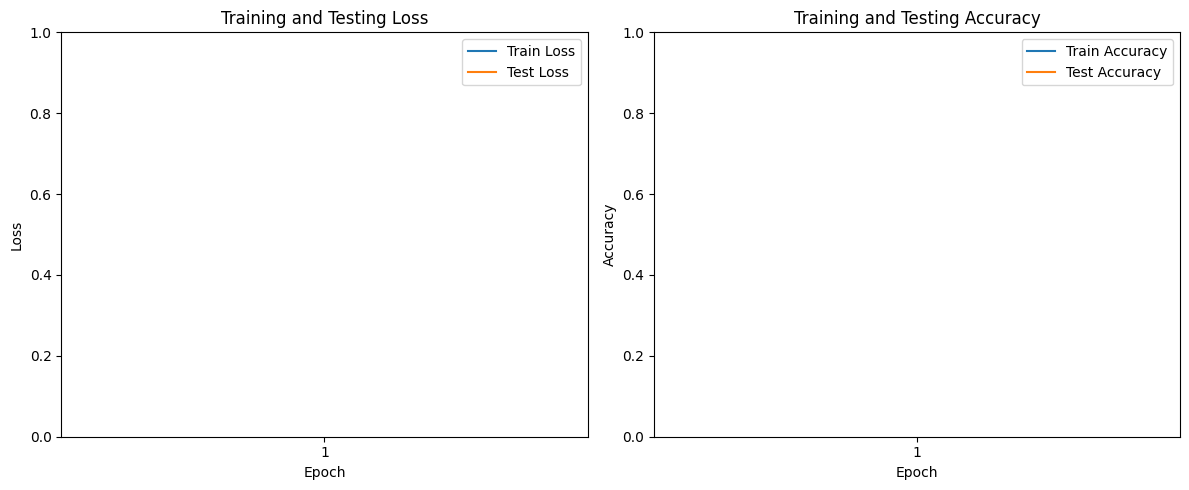

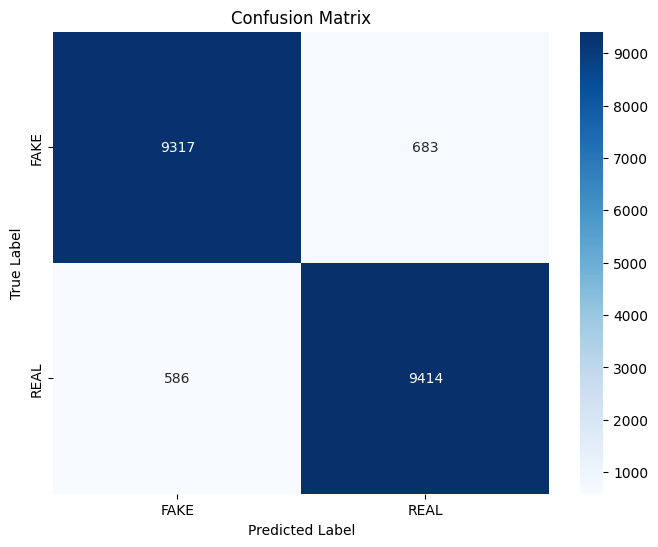

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Use gdown to download CIFAKE.zip from Google Drive
!gdown --id 1DgFquSqGvRGSMpfoKq1yMsHNya1jw9dk -O /content/CIFAKE.zip

import zipfile
import os

# Unzip the CIFAKE.zip file
zip_file_path = "/content/CIFAKE.zip"
output_dir = "/content/CIFAKE"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(output_dir)
print("Dataset unzipped successfully!")

# # Display the structure of the extracted files
# for root, dirs, files in os.walk(output_dir):
#     print(f"Root: {root}")
#     for file in files:
#         print(f"File: {file}")

# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
import seaborn as sns
import numpy as np

# Check if GPU is available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Current device: {device}")

# Set the dataset directory paths
dataset_dir = "/content/CIFAKE"
train_dir = os.path.join(dataset_dir, 'train')  # Path to the training set
test_dir = os.path.join(dataset_dir, 'test')    # Path to the test set

# Define data augmentation and preprocessing transformations for training and test sets
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Load the training and test datasets
train_dataset = datasets.ImageFolder(train_dir, transform=data_transforms['train'])
test_dataset = datasets.ImageFolder(test_dir, transform=data_transforms['test'])

# Create data loaders for training and test sets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

# Load the pretrained ResNet18 model
model = models.resnet18(pretrained=True)

# Replace the final fully connected layer for binary classification
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)
model = model.to(device)

# Set the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


print(f"Training set loaded: {len(train_dataset)} samples, Classes: {train_dataset.classes}")
print(f"Test set loaded: {len(test_dataset)} samples, Classes: {test_dataset.classes}")

# Save the model
model_save_path = "/content/drive/MyDrive/saved_model.pth"  # Set model save path
torch.save(model.state_dict(), model_save_path)
print(f"Model saved at: {model_save_path}")
# print(model)

# Function to train the model
def train_model(model, criterion, optimizer, num_epochs=1):
    # Track loss and accuracy for each epoch
    train_loss_history = []
    test_loss_history = []  # Renamed variable
    train_acc_history = []
    test_acc_history = []  # Renamed variable

    for epoch in range(num_epochs):
        print('-' * 10)
        print(f"Epoch {epoch+1}/{num_epochs}")

        # Iterate through both training and test phases
        for phase in ['train', 'test']:
            if phase == 'train':
                model.train()  # Set model to training mode
                loader = train_loader
            else:
                model.eval()   # Set model to evaluation mode
                loader = test_loader

            running_loss = 0.0
            running_corrects = 0

            # Loop through the data in batches
            for inputs, labels in loader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Enable/Disable gradients based on phase
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    _, preds = torch.max(outputs, 1)

                    # Backpropagation and optimization only in the training phase
                    if phase == 'train':
                        optimizer.zero_grad()
                        loss.backward()
                        optimizer.step()

                # Accumulate loss and number of correct predictions
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            # Calculate epoch loss and accuracy
            epoch_loss = running_loss / len(loader.dataset)
            epoch_acc = running_corrects.double() / len(loader.dataset)

            # Print loss and accuracy for each phase
            if phase == 'train':
                print(f"Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")
                train_loss_history.append(epoch_loss)
                train_acc_history.append(epoch_acc.item())
            else:
                print(f"Test Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")
                test_loss_history.append(epoch_loss)
                test_acc_history.append(epoch_acc.item())

    # Return the model and the loss/accuracy history
    return model, train_loss_history, test_loss_history, train_acc_history, test_acc_history

# Train the model and record history for each epoch
model, train_loss_history, test_loss_history, train_acc_history, test_acc_history = train_model(model, criterion, optimizer, num_epochs=1)

# Function to evaluate the model (Calculate Precision, Recall, F1-Score for evaluation)
def evaluate_model(model, loader, criterion):
    model.eval()
    test_loss = 0.0
    corrects = 0
    all_preds = []
    all_labels = []

    # Iterate through the test set
    for inputs, labels in loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        with torch.no_grad():  # Disable gradient calculations for inference
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)

        # Accumulate loss and number of correct predictions
        test_loss += loss.item() * inputs.size(0)
        corrects += torch.sum(preds == labels.data)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    # Calculate overall loss and accuracy for the test set
    test_loss = test_loss / len(loader.dataset)
    test_acc = corrects.double() / len(loader.dataset)
    print(f"Test Loss: {test_loss:.4f} Test Accuracy: {test_acc:.4f}")

    # Calculate Precision, Recall, F1-Score for evaluation
    precision = precision_score(all_labels, all_preds, average='binary')
    recall = recall_score(all_labels, all_preds, average='binary')
    f1 = f1_score(all_labels, all_preds, average='binary')
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    return all_preds, all_labels

# Evaluate the model on the test set
preds, labels = evaluate_model(model, test_loader, criterion)

plt.figure(figsize=(12, 5))

# Plot changes in training and test loss over epochs
plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label='Train Loss')
plt.plot(test_loss_history, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.ylim(0, 1)
plt.xticks(range(len(train_loss_history)), range(1, len(train_loss_history) + 1))
plt.legend()

# Plot changes in training and test accuracy over epochs
plt.subplot(1, 2, 2)
plt.plot(train_acc_history, label='Train Accuracy')
plt.plot(test_acc_history, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.ylim(0, 1)
plt.xticks(range(len(train_acc_history)), range(1, len(train_acc_history) + 1))
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()

# Plot the confusion matrix
cm = confusion_matrix(labels, preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=train_dataset.classes, yticklabels=train_dataset.classes)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
def evaluate_attack_effectiveness():
    """Evaluate model performance changes before and after attack"""
    # Set paths
    dataset_dir = "/content/CIFAKE"
    test_fake_dir = os.path.join(dataset_dir, 'test', 'FAKE')
    test_real_dir = os.path.join(dataset_dir, 'test', 'REAL')
    output_dir = "/content/attacked_images"
    stats_dir = os.path.join(output_dir, "stats")

    # Create output directories
    os.makedirs(output_dir, exist_ok=True)
    os.makedirs(stats_dir, exist_ok=True)

    # Load model
    print("Loading model...")
    model = models.resnet18(pretrained=False)
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, 2)
    model.load_state_dict(torch.load('/content/drive/MyDrive/saved_model.pth', weights_only=True))
    model = model.to(device)
    model.eval()

    # Sample images
    print("Sampling images...")
    fake_images = random.sample([f for f in os.listdir(test_fake_dir)
                               if f.lower().endswith(('.jpg', '.png', '.jpeg'))], 100)
    real_images = random.sample([f for f in os.listdir(test_real_dir)
                               if f.lower().endswith(('.jpg', '.png', '.jpeg'))], 100)

    # Initialize attacker
    attacker = StickerAttack(model, device)

    # Store evaluation results
    results = {
        'pre_attack': {
            'predictions': [],
            'true_labels': [],
            'confidences': []
        },
        'post_attack': {
            'predictions': [],
            'true_labels': [],
            'confidences': []
        },
        'attack_success': {
            'total': 0,
            'successful': 0,
            'confidence_changes': []
        }
    }

    # Phase 1: Evaluate original images
    print("\nEvaluating original images...")
    for img_name in tqdm(fake_images + real_images, desc="Pre-attack evaluation"):
        is_real = img_name in real_images
        img_path = os.path.join(test_real_dir if is_real else test_fake_dir, img_name)

        try:
            # Load and evaluate original image
            image = Image.open(img_path).convert('RGB')
            with torch.no_grad():
                input_tensor = attacker.transform(image).unsqueeze(0).to(device)
                output = model(input_tensor)
                prob = F.softmax(output, dim=1)
                pred_class = torch.argmax(output, dim=1).item()
                confidence = prob[0][pred_class].item()

            # Record results
            results['pre_attack']['predictions'].append(pred_class)
            results['pre_attack']['true_labels'].append(1 if is_real else 0)
            results['pre_attack']['confidences'].append(confidence)

        except Exception as e:
            print(f"\nError evaluating {img_name}: {e}")
            continue

    # Calculate initial accuracy
    initial_accuracy = accuracy_score(
        results['pre_attack']['true_labels'],
        results['pre_attack']['predictions']
    )
    print(f"\nInitial accuracy: {initial_accuracy:.2%}")

    # Phase 2: Execute attacks
    print("\nExecuting attacks...")
    all_images = list(zip(fake_images + real_images,
                         ['fake']*len(fake_images) + ['real']*len(real_images)))

    for img_name, img_type in tqdm(all_images, desc="Attacking images"):
        try:
            # Set paths
            source_dir = test_real_dir if img_type == 'real' else test_fake_dir
            img_path = os.path.join(source_dir, img_name)
            output_path = os.path.join(output_dir, f"attacked_{img_name}")

            # Load image
            image = Image.open(img_path).convert('RGB')
            results['attack_success']['total'] += 1

            # Select attack source (use real images for fake ones and vice versa)
            source_dir = test_real_dir if img_type == 'fake' else test_fake_dir
            source_images = real_images if img_type == 'fake' else fake_images
            source_path = os.path.join(source_dir, random.choice(source_images))

            # Execute attack
            result, original_pred = attacker.attack(image, [Image.open(source_path).convert('RGB')])

            if result is not None:
                attacked_img, pred_class, confidence = result
                attacked_img.save(output_path)

                # Record attack results
                results['post_attack']['predictions'].append(pred_class)
                results['post_attack']['true_labels'].append(1 if img_type == 'real' else 0)
                results['post_attack']['confidences'].append(confidence)

                # Check if attack was successful
                target_class = 1 if img_type == 'fake' else 0
                if pred_class == target_class:
                    results['attack_success']['successful'] += 1

                # Record confidence change
                with torch.no_grad():
                    original_tensor = attacker.transform(image).unsqueeze(0).to(device)
                    original_conf = F.softmax(model(original_tensor), dim=1)[0][original_pred].item()
                results['attack_success']['confidence_changes'].append(original_conf - confidence)

            else:
                # If attack failed, record original prediction
                results['post_attack']['predictions'].append(original_pred)
                results['post_attack']['true_labels'].append(1 if img_type == 'real' else 0)
                shutil.copy2(img_path, output_path)

        except Exception as e:
            print(f"\nError processing {img_name}: {e}")
            continue

    # Calculate post-attack accuracy
    final_accuracy = accuracy_score(
        results['post_attack']['true_labels'],
        results['post_attack']['predictions']
    )

    # Calculate attack success rate
    attack_success_rate = results['attack_success']['successful'] / results['attack_success']['total']

    # Generate detailed report
    report = {
        'accuracy_comparison': {
            'initial_accuracy': initial_accuracy,
            'final_accuracy': final_accuracy,
            'accuracy_reduction': initial_accuracy - final_accuracy
        },
        'attack_statistics': {
            'total_attempts': results['attack_success']['total'],
            'successful_attacks': results['attack_success']['successful'],
            'success_rate': attack_success_rate,
            'average_confidence_reduction': np.mean(results['attack_success']['confidence_changes'])
        },
        'class_wise_performance': {
            'pre_attack': classification_report(
                results['pre_attack']['true_labels'],
                results['pre_attack']['predictions']
            ),
            'post_attack': classification_report(
                results['post_attack']['true_labels'],
                results['post_attack']['predictions']
            )
        }
    }

    # Save report
    with open(os.path.join(stats_dir, 'attack_report.json'), 'w') as f:
        json.dump(report, f, indent=4)

    # Create visualizations
    plt.figure(figsize=(15, 5))

    # 1. Accuracy comparison
    plt.subplot(1, 3, 1)
    plt.bar(['Initial', 'After Attack'], [initial_accuracy, final_accuracy])
    plt.title('Model Accuracy Comparison')
    plt.ylabel('Accuracy')

    # 2. Confidence change distribution
    plt.subplot(1, 3, 2)
    plt.hist(results['attack_success']['confidence_changes'], bins=30)
    plt.title('Confidence Reduction Distribution')
    plt.xlabel('Confidence Reduction')
    plt.ylabel('Frequency')

    # 3. Confusion matrix
    plt.subplot(1, 3, 3)
    post_cm = confusion_matrix(
        results['post_attack']['true_labels'],
        results['post_attack']['predictions']
    )
    plt.imshow(post_cm, cmap='Blues')
    plt.title('Post-attack Confusion Matrix')
    plt.colorbar()

    plt.tight_layout()
    plt.savefig(os.path.join(stats_dir, 'attack_analysis.png'))
    plt.close()

    # Print summary
    print("\nAttack Evaluation Summary:")
    print("=" * 50)
    print(f"Initial Accuracy: {initial_accuracy:.2%}")
    print(f"Final Accuracy: {final_accuracy:.2%}")
    print(f"Accuracy Reduction: {initial_accuracy - final_accuracy:.2%}")
    print(f"Attack Success Rate: {attack_success_rate:.2%}")
    print(f"Average Confidence Reduction: {report['attack_statistics']['average_confidence_reduction']:.3f}")

    print("\nPer-class Performance Change:")
    print("\nPre-attack Classification Report:")
    print(report['class_wise_performance']['pre_attack'])
    print("\nPost-attack Classification Report:")
    print(report['class_wise_performance']['post_attack'])

    return report

# Execute evaluation
if __name__ == "__main__":
    report = evaluate_attack_effectiveness()

Loading model...
Sampling images...

Evaluating original images...


Pre-attack evaluation: 100%|██████████| 200/200 [00:02<00:00, 72.59it/s] 



Initial accuracy: 49.00%

Executing attacks...


Attacking images:   2%|▏         | 3/200 [00:00<00:08, 23.50it/s]

Original predicted class: 1, Confidence: 0.508
Found a better attack - New class: 0, Confidence: 0.704
Original predicted class: 0, Confidence: 0.520
Original predicted class: 0, Confidence: 0.611
Original predicted class: 0, Confidence: 0.595
Found a better attack - New class: 1, Confidence: 0.566
Original predicted class: 1, Confidence: 0.530
Found a better attack - New class: 0, Confidence: 0.551
Original predicted class: 1, Confidence: 0.535


Attacking images:   4%|▍         | 9/200 [00:00<00:07, 25.13it/s]

Original predicted class: 0, Confidence: 0.653
Found a better attack - New class: 1, Confidence: 0.654
Original predicted class: 0, Confidence: 0.707
Original predicted class: 1, Confidence: 0.605
Original predicted class: 0, Confidence: 0.666
Found a better attack - New class: 1, Confidence: 0.530
Original predicted class: 1, Confidence: 0.646
Found a better attack - New class: 0, Confidence: 0.603
Original predicted class: 0, Confidence: 0.627


Attacking images:   8%|▊         | 17/200 [00:00<00:05, 31.94it/s]

Original predicted class: 1, Confidence: 0.504
Original predicted class: 1, Confidence: 0.766
Found a better attack - New class: 0, Confidence: 0.599
Original predicted class: 0, Confidence: 0.767
Found a better attack - New class: 1, Confidence: 0.519
Original predicted class: 0, Confidence: 0.772
Original predicted class: 1, Confidence: 0.535
Original predicted class: 1, Confidence: 0.650
Found a better attack - New class: 0, Confidence: 0.553
Original predicted class: 0, Confidence: 0.576
Original predicted class: 0, Confidence: 0.759


Attacking images:  12%|█▎        | 25/200 [00:00<00:05, 34.10it/s]

Original predicted class: 1, Confidence: 0.530
Original predicted class: 1, Confidence: 0.526
Found a better attack - New class: 0, Confidence: 0.520
Original predicted class: 0, Confidence: 0.673
Original predicted class: 0, Confidence: 0.704
Original predicted class: 0, Confidence: 0.659
Found a better attack - New class: 1, Confidence: 0.517
Original predicted class: 1, Confidence: 0.569
Original predicted class: 1, Confidence: 0.525
Original predicted class: 0, Confidence: 0.686


Attacking images:  14%|█▍        | 29/200 [00:00<00:05, 30.25it/s]

Found a better attack - New class: 1, Confidence: 0.554
Original predicted class: 1, Confidence: 0.638
Found a better attack - New class: 0, Confidence: 0.718
Original predicted class: 0, Confidence: 0.593
Found a better attack - New class: 1, Confidence: 0.661
Original predicted class: 1, Confidence: 0.721
Found a better attack - New class: 0, Confidence: 0.606
Original predicted class: 0, Confidence: 0.505
Found a better attack - New class: 1, Confidence: 0.675


Attacking images:  16%|█▋        | 33/200 [00:01<00:05, 28.10it/s]

Original predicted class: 0, Confidence: 0.706
Original predicted class: 0, Confidence: 0.556
Original predicted class: 0, Confidence: 0.845
Original predicted class: 0, Confidence: 0.748
Original predicted class: 0, Confidence: 0.541
Found a better attack - New class: 1, Confidence: 0.524


Attacking images:  18%|█▊        | 37/200 [00:01<00:05, 30.02it/s]

Original predicted class: 1, Confidence: 0.575
Found a better attack - New class: 0, Confidence: 0.653
Original predicted class: 0, Confidence: 0.752
Found a better attack - New class: 1, Confidence: 0.696
Original predicted class: 0, Confidence: 0.620


Attacking images:  23%|██▎       | 46/200 [00:01<00:04, 36.31it/s]

Original predicted class: 0, Confidence: 0.715
Original predicted class: 1, Confidence: 0.827
Found a better attack - New class: 0, Confidence: 0.619
Original predicted class: 0, Confidence: 0.648
Original predicted class: 0, Confidence: 0.529
Original predicted class: 1, Confidence: 0.558
Found a better attack - New class: 0, Confidence: 0.659
Original predicted class: 1, Confidence: 0.547
Original predicted class: 0, Confidence: 0.500
Original predicted class: 0, Confidence: 0.696
Found a better attack - New class: 1, Confidence: 0.640
Original predicted class: 0, Confidence: 0.549
Found a better attack - New class: 1, Confidence: 0.554


Attacking images:  25%|██▌       | 50/200 [00:01<00:04, 35.86it/s]

Original predicted class: 0, Confidence: 0.522
Found a better attack - New class: 1, Confidence: 0.750
Original predicted class: 0, Confidence: 0.680
Original predicted class: 0, Confidence: 0.806
Found a better attack - New class: 1, Confidence: 0.573
Original predicted class: 0, Confidence: 0.628
Original predicted class: 0, Confidence: 0.610
Found a better attack - New class: 1, Confidence: 0.675
Original predicted class: 0, Confidence: 0.696


Attacking images:  28%|██▊       | 55/200 [00:01<00:03, 38.29it/s]

Original predicted class: 0, Confidence: 0.699
Found a better attack - New class: 1, Confidence: 0.541
Original predicted class: 0, Confidence: 0.871
Original predicted class: 1, Confidence: 0.537
Found a better attack - New class: 0, Confidence: 0.559

Attacking images:  30%|██▉       | 59/200 [00:01<00:03, 38.51it/s]


Original predicted class: 1, Confidence: 0.655
Found a better attack - New class: 0, Confidence: 0.699
Original predicted class: 0, Confidence: 0.517
Found a better attack - New class: 1, Confidence: 0.618
Original predicted class: 0, Confidence: 0.533
Original predicted class: 1, Confidence: 0.681
Found a better attack - New class: 0, Confidence: 0.625
Original predicted class: 0, Confidence: 0.647
Original predicted class: 0, Confidence: 0.554


Attacking images:  32%|███▏      | 64/200 [00:01<00:03, 37.98it/s]

Found a better attack - New class: 1, Confidence: 0.596
Original predicted class: 1, Confidence: 0.816
Original predicted class: 0, Confidence: 0.534


Attacking images:  34%|███▍      | 69/200 [00:02<00:03, 40.25it/s]

Original predicted class: 0, Confidence: 0.610
Found a better attack - New class: 1, Confidence: 0.626
Original predicted class: 1, Confidence: 0.739
Original predicted class: 1, Confidence: 0.547
Found a better attack - New class: 0, Confidence: 0.754
Original predicted class: 0, Confidence: 0.717
Original predicted class: 1, Confidence: 0.645
Found a better attack - New class: 0, Confidence: 0.698
Original predicted class: 0, Confidence: 0.791
Found a better attack - New class: 1, Confidence: 0.675


Attacking images:  37%|███▋      | 74/200 [00:02<00:03, 40.37it/s]

Original predicted class: 1, Confidence: 0.508
Original predicted class: 0, Confidence: 0.710
Found a better attack - New class: 1, Confidence: 0.528
Original predicted class: 1, Confidence: 0.568


Attacking images:  40%|███▉      | 79/200 [00:02<00:03, 37.33it/s]

Found a better attack - New class: 0, Confidence: 0.517
Original predicted class: 0, Confidence: 0.501
Original predicted class: 0, Confidence: 0.541
Original predicted class: 0, Confidence: 0.611
Found a better attack - New class: 1, Confidence: 0.775
Original predicted class: 1, Confidence: 0.806
Found a better attack - New class: 0, Confidence: 0.653
Original predicted class: 0, Confidence: 0.771
Found a better attack - New class: 1, Confidence: 0.554


Attacking images:  42%|████▏     | 83/200 [00:02<00:03, 32.19it/s]

Original predicted class: 0, Confidence: 0.600
Found a better attack - New class: 1, Confidence: 0.552
Original predicted class: 0, Confidence: 0.681
Original predicted class: 1, Confidence: 0.505
Found a better attack - New class: 0, Confidence: 0.808
Original predicted class: 0, Confidence: 0.817
Original predicted class: 0, Confidence: 0.554
Found a better attack - New class: 1, Confidence: 0.571


Attacking images:  44%|████▎     | 87/200 [00:02<00:03, 28.88it/s]

Original predicted class: 1, Confidence: 0.647
Original predicted class: 0, Confidence: 0.619
Found a better attack - New class: 1, Confidence: 0.552
Original predicted class: 0, Confidence: 0.736
Original predicted class: 1, Confidence: 0.566
Original predicted class: 0, Confidence: 0.612
Original predicted class: 1, Confidence: 0.687


Attacking images:  46%|████▌     | 92/200 [00:02<00:03, 31.06it/s]

Original predicted class: 1, Confidence: 0.605
Found a better attack - New class: 0, Confidence: 0.603
Original predicted class: 0, Confidence: 0.743


Attacking images:  48%|████▊     | 97/200 [00:02<00:02, 34.61it/s]

Original predicted class: 1, Confidence: 0.611
Found a better attack - New class: 0, Confidence: 0.505
Original predicted class: 1, Confidence: 0.532
Original predicted class: 1, Confidence: 0.585
Original predicted class: 0, Confidence: 0.716
Original predicted class: 0, Confidence: 0.542
Found a better attack - New class: 1, Confidence: 0.748
Original predicted class: 1, Confidence: 0.738
Original predicted class: 0, Confidence: 0.597
Found a better attack - New class: 1, Confidence: 0.605


Attacking images:  52%|█████▎    | 105/200 [00:03<00:02, 33.51it/s]

Original predicted class: 0, Confidence: 0.662
Original predicted class: 0, Confidence: 0.624
Original predicted class: 0, Confidence: 0.530
Original predicted class: 1, Confidence: 0.518
Found a better attack - New class: 0, Confidence: 0.745
Original predicted class: 1, Confidence: 0.511
Found a better attack - New class: 0, Confidence: 0.660
Original predicted class: 1, Confidence: 0.667
Original predicted class: 0, Confidence: 0.504
Original predicted class: 0, Confidence: 0.626


Attacking images:  55%|█████▍    | 109/200 [00:03<00:02, 34.22it/s]

Original predicted class: 1, Confidence: 0.641
Found a better attack - New class: 0, Confidence: 0.684
Original predicted class: 1, Confidence: 0.549
Original predicted class: 1, Confidence: 0.557
Original predicted class: 0, Confidence: 0.643


Attacking images:  56%|█████▋    | 113/200 [00:03<00:02, 30.13it/s]

Original predicted class: 1, Confidence: 0.507
Original predicted class: 0, Confidence: 0.507
Original predicted class: 1, Confidence: 0.677
Found a better attack - New class: 0, Confidence: 0.628
Original predicted class: 1, Confidence: 0.514
Found a better attack - New class: 0, Confidence: 0.656
Original predicted class: 1, Confidence: 0.600


Attacking images:  58%|█████▊    | 117/200 [00:03<00:03, 26.62it/s]

Original predicted class: 1, Confidence: 0.564
Found a better attack - New class: 0, Confidence: 0.764
Original predicted class: 0, Confidence: 0.545


Attacking images:  60%|██████    | 121/200 [00:03<00:02, 26.86it/s]

Original predicted class: 1, Confidence: 0.591
Original predicted class: 1, Confidence: 0.674
Found a better attack - New class: 0, Confidence: 0.551
Original predicted class: 0, Confidence: 0.528
Original predicted class: 0, Confidence: 0.682
Original predicted class: 0, Confidence: 0.586


Attacking images:  62%|██████▎   | 125/200 [00:03<00:02, 28.88it/s]

Original predicted class: 0, Confidence: 0.736


Attacking images:  64%|██████▍   | 129/200 [00:03<00:02, 31.16it/s]

Original predicted class: 1, Confidence: 0.609
Original predicted class: 1, Confidence: 0.544
Found a better attack - New class: 0, Confidence: 0.592
Original predicted class: 0, Confidence: 0.551
Original predicted class: 0, Confidence: 0.505
Original predicted class: 0, Confidence: 0.534
Original predicted class: 1, Confidence: 0.534
Found a better attack - New class: 0, Confidence: 0.688


Attacking images:  68%|██████▊   | 137/200 [00:04<00:02, 30.34it/s]

Original predicted class: 0, Confidence: 0.647
Original predicted class: 0, Confidence: 0.685
Original predicted class: 0, Confidence: 0.615
Original predicted class: 0, Confidence: 0.574
Found a better attack - New class: 1, Confidence: 0.756
Original predicted class: 0, Confidence: 0.577
Found a better attack - New class: 1, Confidence: 0.607
Original predicted class: 0, Confidence: 0.777
Original predicted class: 0, Confidence: 0.550


Attacking images:  70%|███████   | 141/200 [00:04<00:02, 25.39it/s]

Original predicted class: 0, Confidence: 0.553
Original predicted class: 1, Confidence: 0.769
Found a better attack - New class: 0, Confidence: 0.520
Original predicted class: 0, Confidence: 0.702


Attacking images:  72%|███████▏  | 144/200 [00:04<00:02, 19.90it/s]

Original predicted class: 0, Confidence: 0.748
Original predicted class: 1, Confidence: 0.741
Original predicted class: 1, Confidence: 0.730
Found a better attack - New class: 0, Confidence: 0.545


Attacking images:  74%|███████▎  | 147/200 [00:04<00:02, 18.51it/s]

Original predicted class: 0, Confidence: 0.564
Original predicted class: 0, Confidence: 0.716
Found a better attack - New class: 1, Confidence: 0.607
Original predicted class: 1, Confidence: 0.584
Original predicted class: 0, Confidence: 0.701


Attacking images:  75%|███████▌  | 150/200 [00:05<00:02, 17.64it/s]

Found a better attack - New class: 1, Confidence: 0.598
Original predicted class: 0, Confidence: 0.921
Original predicted class: 1, Confidence: 0.563
Found a better attack - New class: 0, Confidence: 0.730
Original predicted class: 1, Confidence: 0.552
Found a better attack - New class: 0, Confidence: 0.641
Original predicted class: 0, Confidence: 0.502


Attacking images:  78%|███████▊  | 156/200 [00:05<00:02, 19.90it/s]

Original predicted class: 0, Confidence: 0.511
Original predicted class: 0, Confidence: 0.621
Found a better attack - New class: 1, Confidence: 0.563
Original predicted class: 1, Confidence: 0.731
Original predicted class: 0, Confidence: 0.652


Attacking images:  80%|███████▉  | 159/200 [00:05<00:02, 18.55it/s]

Original predicted class: 0, Confidence: 0.724
Found a better attack - New class: 1, Confidence: 0.528
Original predicted class: 1, Confidence: 0.529
Found a better attack - New class: 0, Confidence: 0.528
Original predicted class: 1, Confidence: 0.539
Original predicted class: 0, Confidence: 0.574
Original predicted class: 1, Confidence: 0.559


Attacking images:  84%|████████▎ | 167/200 [00:05<00:01, 25.03it/s]

Original predicted class: 0, Confidence: 0.701
Original predicted class: 0, Confidence: 0.599
Found a better attack - New class: 1, Confidence: 0.559
Original predicted class: 0, Confidence: 0.581
Original predicted class: 1, Confidence: 0.582
Found a better attack - New class: 0, Confidence: 0.791
Original predicted class: 0, Confidence: 0.576
Original predicted class: 0, Confidence: 0.538
Found a better attack - New class: 1, Confidence: 0.533
Original predicted class: 0, Confidence: 0.582
Original predicted class: 0, Confidence: 0.507
Found a better attack - New class: 1, Confidence: 0.644


Attacking images:  88%|████████▊ | 175/200 [00:06<00:00, 30.83it/s]

Original predicted class: 0, Confidence: 0.810
Original predicted class: 0, Confidence: 0.706
Found a better attack - New class: 1, Confidence: 0.612
Original predicted class: 0, Confidence: 0.505
Original predicted class: 1, Confidence: 0.767
Original predicted class: 0, Confidence: 0.533
Original predicted class: 1, Confidence: 0.590
Found a better attack - New class: 0, Confidence: 0.623
Original predicted class: 0, Confidence: 0.525
Original predicted class: 0, Confidence: 0.581


Attacking images:  90%|████████▉ | 179/200 [00:06<00:00, 25.15it/s]

Found a better attack - New class: 1, Confidence: 0.535
Original predicted class: 0, Confidence: 0.511
Found a better attack - New class: 1, Confidence: 0.607
Original predicted class: 0, Confidence: 0.554
Original predicted class: 0, Confidence: 0.561


Attacking images:  91%|█████████ | 182/200 [00:06<00:00, 21.29it/s]

Found a better attack - New class: 1, Confidence: 0.552
Original predicted class: 0, Confidence: 0.607
Original predicted class: 1, Confidence: 0.651
Found a better attack - New class: 0, Confidence: 0.673
Original predicted class: 0, Confidence: 0.552
Original predicted class: 0, Confidence: 0.556


Attacking images:  94%|█████████▍| 189/200 [00:06<00:00, 26.54it/s]

Original predicted class: 0, Confidence: 0.579
Original predicted class: 1, Confidence: 0.604
Original predicted class: 1, Confidence: 0.544
Found a better attack - New class: 0, Confidence: 0.707
Original predicted class: 0, Confidence: 0.653
Found a better attack - New class: 1, Confidence: 0.710
Original predicted class: 1, Confidence: 0.537
Found a better attack - New class: 0, Confidence: 0.657
Original predicted class: 0, Confidence: 0.508
Original predicted class: 0, Confidence: 0.597
Original predicted class: 1, Confidence: 0.506
Original predicted class: 0, Confidence: 0.616
Original predicted class: 0, Confidence: 0.646

Attacking images:  99%|█████████▉| 198/200 [00:06<00:00, 29.76it/s]


Found a better attack - New class: 1, Confidence: 0.683
Original predicted class: 0, Confidence: 0.643
Original predicted class: 1, Confidence: 0.668
Original predicted class: 0, Confidence: 0.722
Original predicted class: 0, Confidence: 0.617
Found a better attack - New class: 1, Confidence: 0.565
Original predicted class: 0, Confidence: 0.549


Attacking images: 100%|██████████| 200/200 [00:06<00:00, 28.65it/s]


Original predicted class: 1, Confidence: 0.572
Found a better attack - New class: 0, Confidence: 0.700

Attack Evaluation Summary:
Initial Accuracy: 49.00%
Final Accuracy: 43.50%
Accuracy Reduction: 5.50%
Attack Success Rate: 24.00%
Average Confidence Reduction: -0.005

Per-class Performance Change:

Pre-attack Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.62      0.55       100
           1       0.49      0.36      0.41       100

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.48       200
weighted avg       0.49      0.49      0.48       200


Post-attack Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.55      0.49       100
           1       0.42      0.32      0.36       100

    accuracy                           0.43       200
   macro avg       0.43      0.44      0.43       200
weighted avg       0.43      

In [ ]:
import os
import json
import random
import shutil
from PIL import Image
from tqdm import tqdm
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import time
from collections import defaultdict

def sample_dataset(source_dir, samples_per_class=10):
    """
    Sample a fixed number of images from each class.

    Args:
        source_dir: Root directory of the dataset.
        samples_per_class: Number of images to sample from each class.

    Returns:
        List of sampled image paths and their corresponding class names.
    """
    sampled_images = []
    class_counts = defaultdict(int)

    print("Sampling dataset...")

    # Get all classes
    classes = [d for d in os.listdir(source_dir)
               if os.path.isdir(os.path.join(source_dir, d))]
    print(f"Found {len(classes)} classes")

    # Randomly sample from each class
    for class_name in classes:
        class_dir = os.path.join(source_dir, class_name)
        images = [f for f in os.listdir(class_dir)
                  if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

        # If the number of images in the class is insufficient, use them all
        n_samples = min(samples_per_class, len(images))
        selected_images = random.sample(images, n_samples)

        for img_name in selected_images:
            img_path = os.path.join(class_dir, img_name)
            sampled_images.append((img_path, class_name))
            class_counts[class_name] += 1

    print(f"Total sampled {len(sampled_images)} images")
    print(f"Average {np.mean(list(class_counts.values())):.1f} images per class")

    return sampled_images



class SelfStickerAttack:
    def __init__(self, model, device='cuda' if torch.cuda.is_available() else 'cpu'):
        self.model = model.to(device)
        self.device = device
        self.transform = transforms.Compose([
            transforms.Resize((160, 160)),
            transforms.ToTensor(),
            transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
        ])

    def extract_stickers(self, image, num_stickers=5, min_size=32, max_size=64):
        """Extract multiple stickers from the original image."""
        width, height = image.size
        stickers = []
        positions = []

        # Calculate the salient regions of the image
        img_array = np.array(image)
        gray = cv2.cvtColor(img_array, cv2.COLOR_RGB2GRAY)
        saliency = cv2.Laplacian(gray, cv2.CV_64F).var()  # Calculate saliency
        edges = cv2.Canny(gray, 100, 200)  # Edge detection

        for _ in range(num_stickers):
            # Randomly choose sticker size
            w = random.randint(min_size, max_size)
            h = random.randint(min_size, max_size)

            # Attempt to find the best position
            best_score = float('-inf')
            best_pos = None
            best_sticker = None

            # Try multiple times to find the best position
            for _ in range(10):
                x = random.randint(0, width - w)
                y = random.randint(0, height - h)

                # Evaluate the area
                region_edges = edges[y:y+h, x:x+w]
                region_saliency = saliency[y:y+h, x:x+w] if isinstance(saliency, np.ndarray) else saliency

                # Calculate area score (edge diversity and saliency)
                score = np.mean(region_edges) + (region_saliency if isinstance(region_saliency, (int, float)) else np.mean(region_saliency))

                if score > best_score:
                    best_score = score
                    best_pos = (x, y, w, h)
                    best_sticker = image.crop((x, y, x + w, y + h))

            if best_sticker is not None:
                # Enhance the sticker
                enhanced_sticker = self.enhance_sticker(best_sticker)
                stickers.append(enhanced_sticker)
                positions.append(best_pos)

        return stickers, positions

    def enhance_sticker(self, sticker):
        """Enhance the adversarial nature of the sticker."""
        # Convert to numpy array
        sticker_array = np.array(sticker)

        # Increase contrast
        enhanced = cv2.convertScaleAbs(sticker_array, alpha=1.5, beta=0)

        # Add high-frequency noise
        noise = np.random.normal(0, 25, sticker_array.shape).astype(np.int32)
        enhanced = np.clip(enhanced + noise, 0, 255).astype(np.uint8)

        # Sharpening
        kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
        enhanced = cv2.filter2D(enhanced, -1, kernel)

        # Color perturbation
        for c in range(3):
            channel = enhanced[:,:,c]
            channel = channel + np.random.uniform(-20, 20)
            enhanced[:,:,c] = np.clip(channel, 0, 255)

        return Image.fromarray(enhanced)

    def apply_sticker(self, image, sticker, position, blend_alpha=0.8):
        """Apply the sticker to the image."""
        x, y, w, h = position
        result = np.array(image).astype(np.float32)
        sticker_array = np.array(sticker).astype(np.float32)

        # Create gradient alpha channel
        alpha = np.ones((h, w), dtype=np.float32) * blend_alpha
        fade_width = 5

        # Edge gradient
        for i in range(fade_width):
            factor = i / fade_width
            alpha[i,:] *= factor
            alpha[-(i+1),:] *= factor
            alpha[:,i] *= factor
            alpha[:,-(i+1)] *= factor

        alpha = cv2.GaussianBlur(alpha, (3, 3), 0)
        alpha = alpha[..., np.newaxis]

        # Blend sticker
        blend_region = result[y:y+h, x:x+w] * (1 - alpha) + sticker_array * alpha
        result[y:y+h, x:x+w] = blend_region

        return Image.fromarray(np.clip(result, 0, 255).astype(np.uint8))

    def attack(self, image):
        """Execute the attack."""
        self.model.eval()
        # Get original prediction
        with torch.no_grad():
            input_tensor = self.transform(image).unsqueeze(0).to(self.device)
            original_pred = torch.argmax(self.model(input_tensor), dim=1).item()
            original_conf = F.softmax(self.model(input_tensor), dim=1)[0, original_pred].item()

        best_attack = None
        best_confidence = 1.0

        # Try different sticker combinations
        for _ in range(10):  # Multiple attempts
            # Extract stickers
            stickers, positions = self.extract_stickers(image)

            # Attempt stickers one by one
            attacked_img = image
            for sticker, pos in zip(stickers, positions):
                attacked_img = self.apply_sticker(attacked_img, sticker, pos)

            # Evaluate the attack effect
            with torch.no_grad():
                input_tensor = self.transform(attacked_img).unsqueeze(0).to(self.device)
                output = self.model(input_tensor)
                prob = F.softmax(output, dim=1)
                pred_class = torch.argmax(output, dim=1).item()
                confidence = prob[0][pred_class].item()

                if pred_class != original_pred and confidence < best_confidence:
                    best_attack = (attacked_img, pred_class, confidence)
                    best_confidence = confidence

        return best_attack, original_pred

    def evaluate_attack(self, image, original_pred):
        """
        Evaluate the attack effect.
        """
        self.model.eval()
        with torch.no_grad():
            input_tensor = self.transform(image).unsqueeze(0).to(self.device)
            output = self.model(input_tensor)
            prob = F.softmax(output, dim=1)
            pred_class = torch.argmax(output, dim=1).item()
            confidence = prob[0][pred_class].item()

        return pred_class != original_pred, pred_class, confidence


def execute_sampled_attack():
    # Set paths
    source_dir = "/content/datasets/processed_dataset"
    output_dir = "/content/attacked_dataset_selfattack"
    stats_dir = os.path.join(output_dir, "attack_stats")

    # Create directories
    os.makedirs(output_dir, exist_ok=True)
    os.makedirs(stats_dir, exist_ok=True)

    # Sample dataset
    sampled_images = sample_dataset(source_dir, samples_per_class=1)

    # Initialize attacker and statistics
    attacker = SelfStickerAttack(model, device=device)
    stats = {
        'total_images': 0,
        'successful_attacks': 0,
        'confidence_reductions': [],
        'pixel_differences': [],
        'class_changes': defaultdict(int),  # 改用defaultdict
        'processing_times': [],
        'class_success_rates': defaultdict(lambda: {'total': 0, 'success': 0})
    }

    # Process images
    print("\nStarting to process images...")
    pbar = tqdm(sampled_images)

    for img_path, class_name in pbar:
        try:
            # Set output path
            relative_path = os.path.relpath(img_path, source_dir)
            output_path = os.path.join(output_dir, relative_path)
            os.makedirs(os.path.dirname(output_path), exist_ok=True)

            # Load image
            image = Image.open(img_path).convert("RGB")
            stats['total_images'] += 1
            stats['class_success_rates'][class_name]['total'] += 1

            # Execute attack
            start_time = time.time()
            attack_result, original_pred = attacker.attack(image)
            processing_time = time.time() - start_time
            stats['processing_times'].append(processing_time)

            # Get original confidence
            with torch.no_grad():
                input_tensor = attacker.transform(image).unsqueeze(0).to(device)
                original_output = attacker.model(input_tensor)
                original_conf = F.softmax(original_output, dim=1)[0][original_pred].item()

            # Handle attack result
            if attack_result is not None:
                attacked_image, pred_class, confidence = attack_result

                # Save attacked image
                attacked_image.save(output_path)

                # Calculate pixel difference
                pixel_diff = np.abs(np.array(image) - np.array(attacked_image)).mean()
                stats['pixel_differences'].append(pixel_diff)

                if original_pred != pred_class:
                    stats['successful_attacks'] += 1
                    stats['confidence_reductions'].append(original_conf - confidence)
                    stats['class_changes'][f"{original_pred}->{pred_class}"] += 1
                    stats['class_success_rates'][class_name]['success'] += 1
            else:
                # If attack failed, copy original image
                shutil.copy2(img_path, output_path)

            # Update progress bar
            success_rate = stats['successful_attacks'] / stats['total_images']
            avg_conf_reduction = np.mean(stats['confidence_reductions']) if stats['confidence_reductions'] else 0
            pbar.set_description(
                f"Success Rate: {success_rate:.2%} | "
                f"Avg Conf Reduction: {avg_conf_reduction:.3f} | "
                f"Time: {processing_time:.2f}s"
            )

        except Exception as e:
            print(f"Error processing {img_path}: {e}")
            if os.path.exists(img_path):
                # Create output directory if it doesn't exist
                os.makedirs(os.path.dirname(output_path), exist_ok=True)
                # Copy original image on error
                shutil.copy2(img_path, output_path)
            continue

    # Calculate final statistics
    final_stats = {
        'total_images': stats['total_images'],
        'successful_attacks': stats['successful_attacks'],
        'success_rate': stats['successful_attacks'] / stats['total_images'] if stats['total_images'] > 0 else 0,
        'average_confidence_reduction': np.mean(stats['confidence_reductions']) if stats['confidence_reductions'] else 0,
        'average_pixel_difference': np.mean(stats['pixel_differences']) if stats['pixel_differences'] else 0,
        'class_success_rates': dict(stats['class_success_rates']),
        'most_common_changes': sorted(stats['class_changes'].items(), key=lambda x: x[1], reverse=True)[:10]
    }

    # Save statistics
    with open(os.path.join(stats_dir, 'attack_statistics.json'), 'w') as f:
        json.dump(final_stats, f, indent=4)

    # Print summary
    print("\nAttack Summary:")
    print(f"Total images processed: {final_stats['total_images']}")
    print(f"Successful attacks: {final_stats['successful_attacks']}")
    print(f"Success rate: {final_stats['success_rate']:.2%}")
    print(f"Average confidence reduction: {final_stats['average_confidence_reduction']:.4f}")

    return final_stats



if __name__ == "__main__":
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  model = model.to(device)
  stats = execute_sampled_attack()

Sampling dataset...
Found 153 classes
Total sampled 153 images
Average 1.0 images per class

Starting to process images...


Success Rate: 70.59% | Avg Conf Reduction: 0.601 | Time: 0.28s: 100%|██████████| 153/153 [00:56<00:00,  2.70it/s]


Attack Summary:
Total images processed: 153
Successful attacks: 108
Success rate: 70.59%
Average confidence reduction: 0.6013
